# data 불러오기
- import version 설정(터미널에서 지정)
    * pip install scikit-learn==1.1
    * pip install imbalanced-learn==0.9

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.ticker as mtick

# To ensure text placement and advanced grid layout
from matplotlib.gridspec import GridSpec

In [161]:
# aug_test에는 target값이 없어서 aug_train만 사용할 예정
## 그리고 aug_train에서 train, validation, test set을 6:2:2로 나눌 예정
aug_train = pd.read_csv('data/aug_train.csv')

In [162]:
aug_train.head(10)

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   
5        21651  city_176                   0.764    NaN   
6        28806  city_160                   0.920   Male   
7          402   city_46                   0.762   Male   
8        27107  city_103                   0.920   Male   
9          699  city_103                   0.920    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   
5  Has relevent experience    Part time course        Graduate   
6  Has relevent experience       no_enrollment     High School   
7  Has relevent experience       no_enrollment        Graduate   
8  Has relevent experience       no_enrollment        Graduate   
9  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   
5             STEM         11          NaN             NaN            1   
6              NaN          5        50-99  Funded Startup            1   
7             STEM         13          <10         Pvt Ltd           >4   
8             STEM          7        50-99         Pvt Ltd            1   
9             STEM         17       10000+         Pvt Ltd           >4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0  
5              24     1.0  
6              24     0.0  
7              18     1.0  
8              46     1.0  
9             123     0.0

In [163]:
aug_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [164]:
aug_train.shape

(19158, 14)

### 결측치 확인
결측치가 꽤나 많은데 다 살리는 방향으로 갈 거다.
- enrollee_id                  0
- city                         0
- city_development_index       0
- gender                    4508
- relevent_experience          0
- enrolled_university        386
- education_level            460
- major_discipline          2813
- experience                  65
- company_size              5938
- company_type              6140
- last_new_job               423
- training_hours               0
- target                       0

In [165]:
aug_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [166]:
# Check for nulls : 결측치 비율 확인
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [167]:
# 결측치가 아예 없었던 데이터 10203개
# aug_train[aug_train.isnull().any(axis=1)]
aug_train.isna().sum(axis=1).astype(bool).sum()

10203

### 실수형, 문자형 변수

In [168]:
## 실수형, 문자형 변수
var_num = aug_train.select_dtypes(include=['float', 'int']).columns
var_obj = aug_train.select_dtypes(include=['object']).columns

print('features with dtype float : ', len(var_num),'개')
print(var_num)
print('features with dtype object : ', len(var_obj),'개')
print(var_obj)

features with dtype float :  4 개
Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')
features with dtype object :  10 개
Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [169]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

#### 실수형 변수
- 실수형 변수들은 결측치가 없다!

In [170]:
group_num.isna().sum()

enrollee_id               0
city_development_index    0
training_hours            0
target                    0
dtype: int64

#### 범주형 자료 : categorical data 정리

In [171]:
group_obj.isna().sum()

city                      0
gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
dtype: int64

##### city
- city별로 one unique한 city_development_index 값을 가지기 때문에 city는 제거한다.

In [172]:
# Group by 'city' and calculate the number of unique 'city_development_index' values
unique_development_index_counts = aug_train.groupby('city')['city_development_index'].nunique().reset_index()

# Check if any city has more than one unique city_development_index value
cities_with_multiple_development_indices = unique_development_index_counts[unique_development_index_counts['city_development_index'] > 1]

# Display the results
print(f"Cities with more than one unique 'city_development_index':\n{cities_with_multiple_development_indices}")

# Display the unique counts for all cities
print(f"\nUnique 'city_development_index' counts for all cities:\n{unique_development_index_counts}")

Cities with more than one unique 'city_development_index':
Empty DataFrame
Columns: [city, city_development_index]
Index: []

Unique 'city_development_index' counts for all cities:
         city  city_development_index
0      city_1                       1
1     city_10                       1
2    city_100                       1
3    city_101                       1
4    city_102                       1
..        ...                     ...
118   city_93                       1
119   city_94                       1
120   city_97                       1
121   city_98                       1
122   city_99                       1

[123 rows x 2 columns]


In [173]:
aug_train['city'].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [174]:
aug_train.drop(columns=['city'],inplace=True)

##### last_new_job 변수
결측치 처리 방법
1. (aug_train['company_type'].isna()) & (aug_train['company_size'].isna()) 조건에 맞는 행의 'last_new_job'을 'never'로 채움
    - never의 의미는 한 번도 직장을 구해보지 않았다는 의미다.
2. 이후의 남은 결측치는 NaN       230 => Unknown으로 채울 것

In [175]:
aug_train[(aug_train['company_type'].isna())&(aug_train['company_size'].isna())]['last_new_job'].value_counts(dropna=False)

1        2006
never    1518
>4        685
2         594
NaN       193
4         191
3         173
Name: last_new_job, dtype: int64

In [176]:
# 필터링 조건에 맞는 행의 'last_new_job'을 'never'로 채움
mask = (aug_train['company_type'].isna()) & (aug_train['company_size'].isna())
aug_train.loc[mask, 'last_new_job'] = aug_train.loc[mask, 'last_new_job'].fillna('never')

In [177]:
aug_train[(aug_train['company_type'].isna())&(aug_train['company_size'].isna())]['last_new_job'].value_counts(dropna=False)

1        2006
never    1711
>4        685
2         594
4         191
3         173
Name: last_new_job, dtype: int64

In [178]:
aug_train['last_new_job'].value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2645
4        1029
3        1024
NaN       230
Name: last_new_job, dtype: int64

- NaN 230개는 나중에 experience 결측치 처리할 때 다시 보기

In [179]:
aug_train['last_new_job'].fillna('Unknown',inplace=True)

In [180]:
### 보기 좋게만 만들기
aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer


In [181]:
aug_train['last_new_job'].value_counts(dropna=False)

1          8040
>4         3290
2          2900
Never      2645
4          1029
3          1024
Unknown     230
Name: last_new_job, dtype: int64

##### experience 변수
1. 변수 value 값 처리
    - x: '0' if x == '<1' else x
    - x: '0' if x == '>20' else x
        - 대신, 'experience' 열을 기준으로 'experience_over_20' 열 생성
2. 결측치 : NaN      65개 발생
    - 'experience' 열을 기준으로 x가 결측치면 1, 아니면 0으로 'experience_Unknown' 열 생성
    - 'experience' 열에서 결측치는 '0'으로 대체


In [182]:
aug_train['experience'].value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [183]:
aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)

In [184]:
# 'experience' 열을 기준으로 'experience_over_20' 열 생성
aug_train['experience_over_20'] = aug_train['experience'].apply(lambda x: 1 if x == '>20' else 0)

# 'experience' 열에서 '>20'을 '0'으로 대체
aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '>20' else x)


In [185]:
aug_train[aug_train['experience']=='>20']['experience_over_20'].value_counts()

Series([], Name: experience_over_20, dtype: int64)

In [186]:
aug_train['experience_over_20'].value_counts()

0    15872
1     3286
Name: experience_over_20, dtype: int64

In [187]:
# 'experience' 열을 기준으로 x가 결측치면 1, 아니면 0으로 'experience_Unknown' 열 생성
aug_train['experience_Unknown'] = aug_train['experience'].apply(lambda x: 1 if pd.isna(x) else 0)

# 'experience' 열에서 결측치는 '0'으로 대체
aug_train['experience'] = aug_train['experience'].fillna('0')


In [188]:
aug_train['experience'].value_counts(dropna=False)

0     3873
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64

##### company 변수
###### company_size 변수 
- 결측치 :NaN          5938 개,
###### company_type 변수 
- 결측치 :NaN                    6140개,
1. (1711개) company 변수 둘 다 결측치가 있고, last_new_job ='never'인 경우에는 company_type, company_size 둘 다 'Unemployed'
    - last_new_job : 이전 직업과 현재 직업의 몇 년 차이
    - 앞으로 다닐 회사가 아니라, last_new_job가 'never'인 즉, 이전회사가 없었던 얘들은 unemployed 된 애들이라고 생각함

2. 나머지는 'Unknown'으로 만들기
- aug_train['company_size'].fillna('Unknown',inplace=True)
- aug_train['company_type'].fillna('Unknown',inplace=True)
    - 결측치 겹치는 개 : 5360개 -> 얘네는 last_new_job과는 공통점이 없다.
    - company 정보가 현재 회사를 다니고 있고, 회사를 다니는 중에 교육을 받는다.

In [189]:
aug_train['company_size'].value_counts(dropna=False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [190]:
aug_train['company_type'].value_counts(dropna=False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [191]:
aug_train[(aug_train['last_new_job']=='never')&(aug_train['company_size'].isna())]['company_type'].value_counts(dropna=False)

Series([], Name: company_type, dtype: int64)

In [192]:
aug_train[(aug_train['last_new_job']=='never')&(aug_train['company_type'].isna())]['company_size'].value_counts(dropna=False)

Series([], Name: company_size, dtype: int64)

In [193]:
# 필터링 조건 정의
mask = (aug_train['last_new_job']=='never')&(aug_train['company_type'].isna())

# 'company_size'의 NaN 값을 'Unemployed'으로 채움
aug_train.loc[mask, 'company_size'] = aug_train.loc[mask, 'company_size'].fillna('Unemployed')

# 필터링 조건 정의
mask = (aug_train['last_new_job']=='never')&(aug_train['company_size']=='Unemployed')
# 'company_type'의 NaN 값을 'Unemployed'으로 채움
aug_train.loc[mask, 'company_type'] = aug_train.loc[mask, 'company_type'].fillna('Unemployed')


In [194]:
print(aug_train['company_type'].value_counts(dropna=False))
print(aug_train['company_size'].value_counts(dropna=False))

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


In [195]:
aug_train['company_size'].fillna('Unknown',inplace=True)
aug_train['company_type'].fillna('Unknown',inplace=True)

In [196]:
### 보기 좋게만 만들기
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

In [197]:
print(aug_train['company_type'].value_counts(dropna=False))
print(aug_train['company_size'].value_counts(dropna=False))

Pvt Ltd                9817
Unknown                6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
Unknown      5938
50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


##### Gender variable
- 결측치와 Other이랑 합친다.

In [198]:
aug_train['gender'].fillna('Not provided',inplace=True)

In [199]:
# 필터링 조건 수정: 'Not provided' 또는 'Other'
aug_train_gender = aug_train[(aug_train['gender'] == 'Not provided') | (aug_train['gender'] == 'Other')]
aug_train_gender['gender'].value_counts()

Not provided    4508
Other            191
Name: gender, dtype: int64

In [200]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

수치형 데이터 시각화


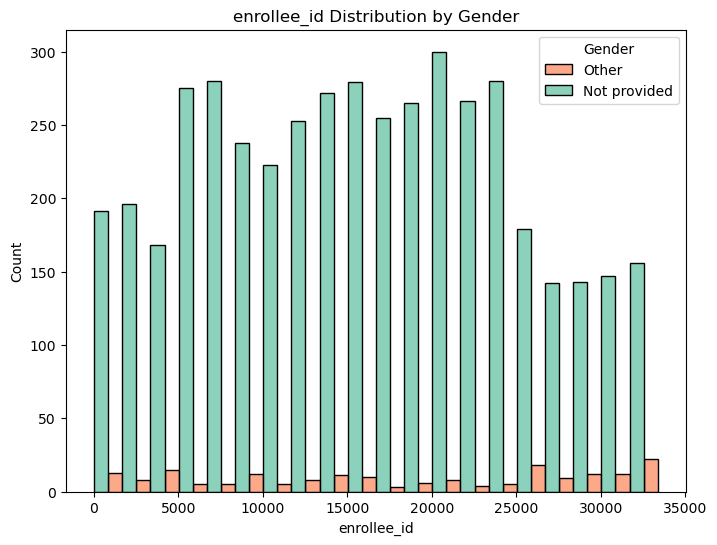

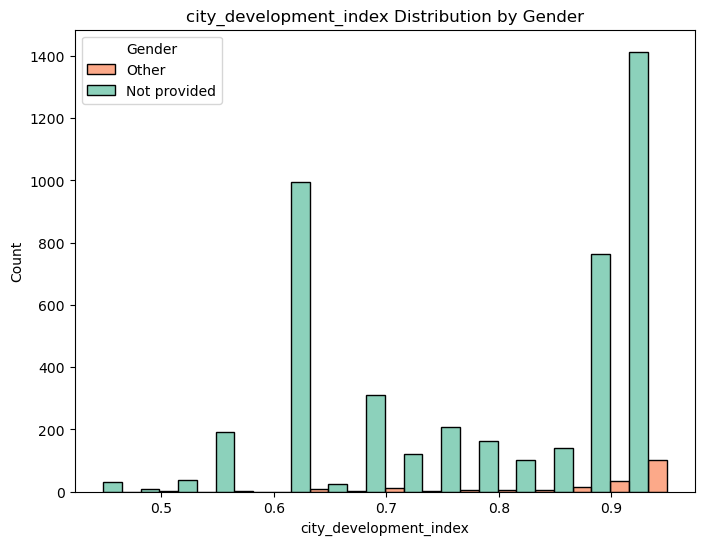

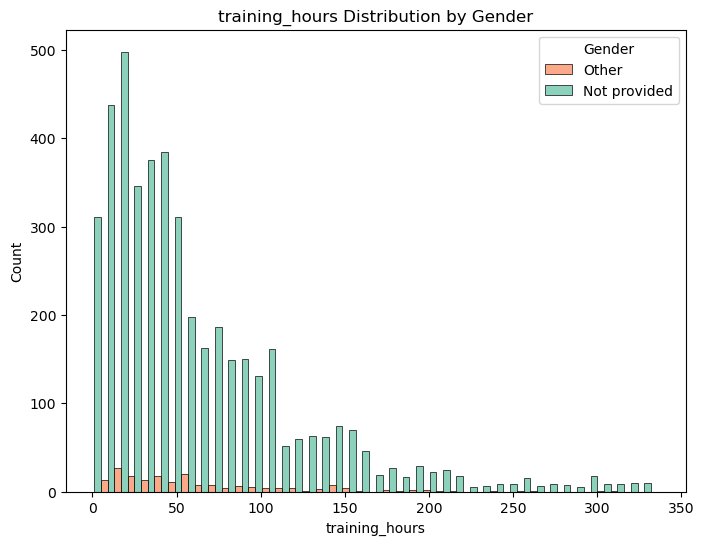

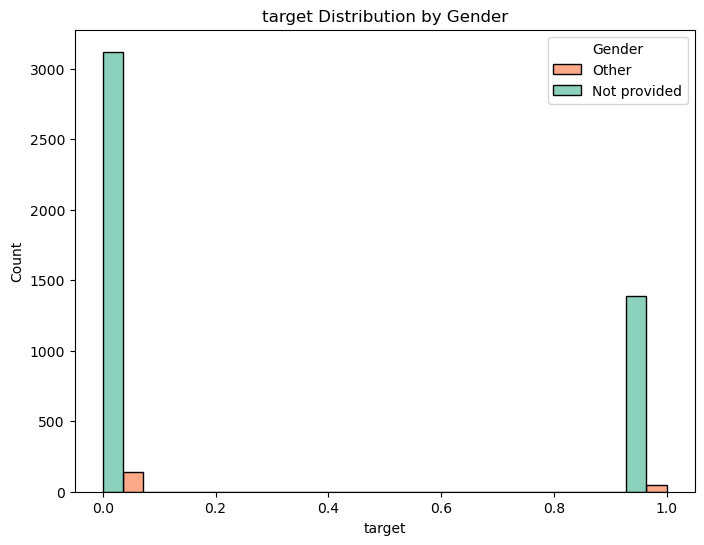

범주형 데이터 시각화


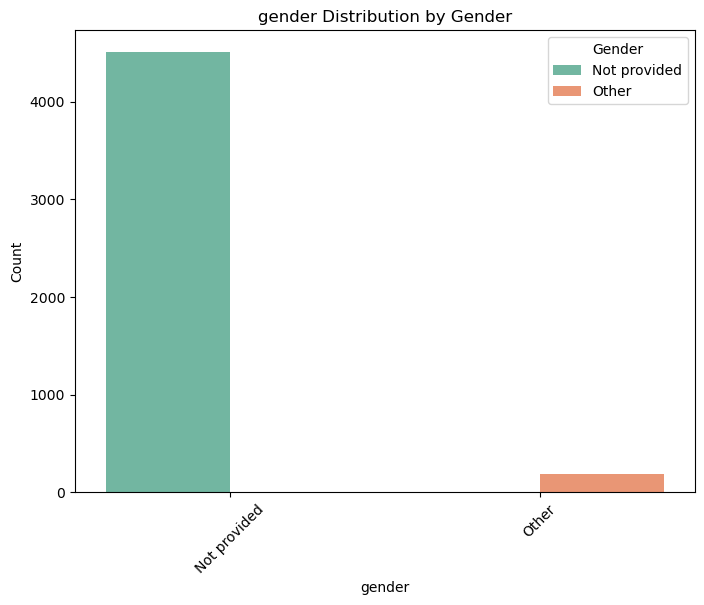

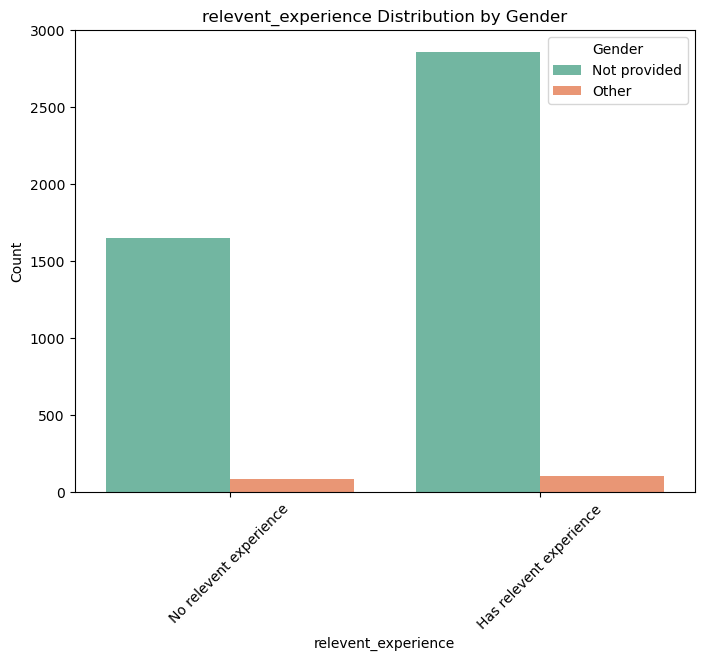

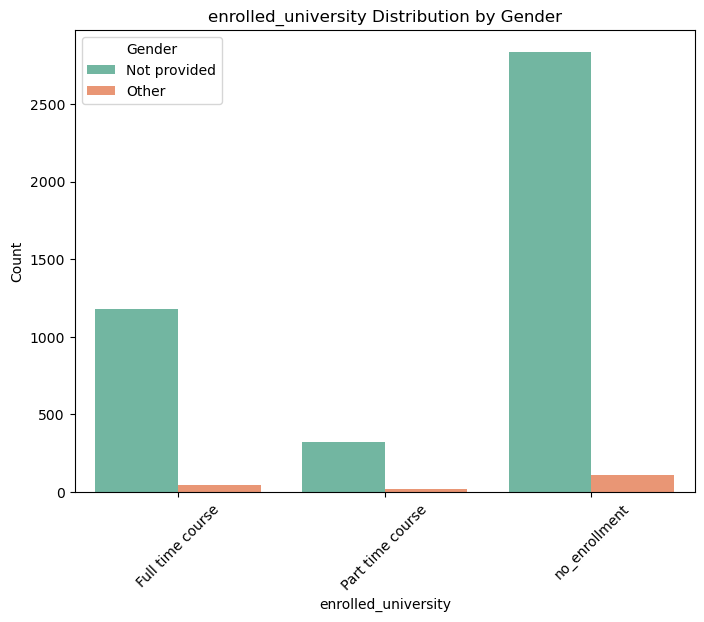

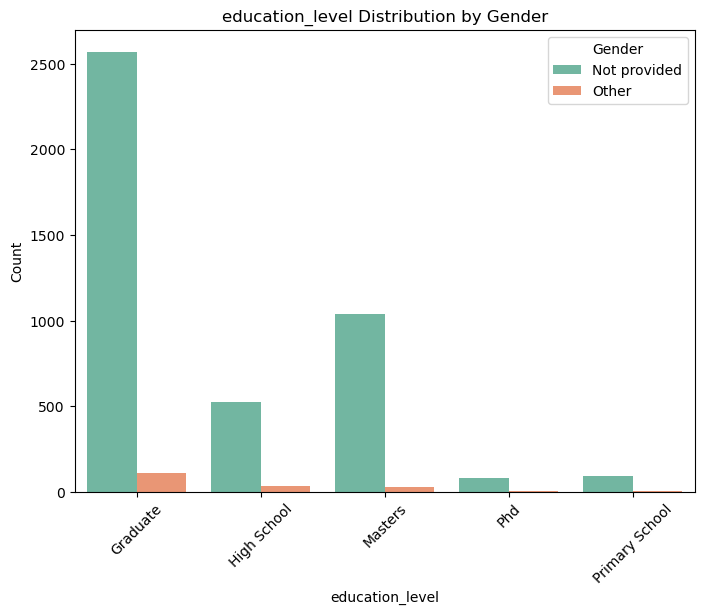

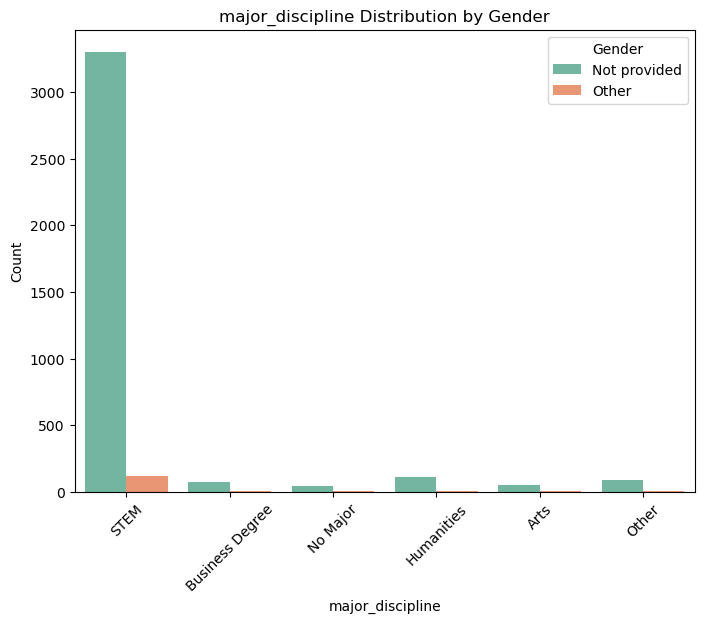

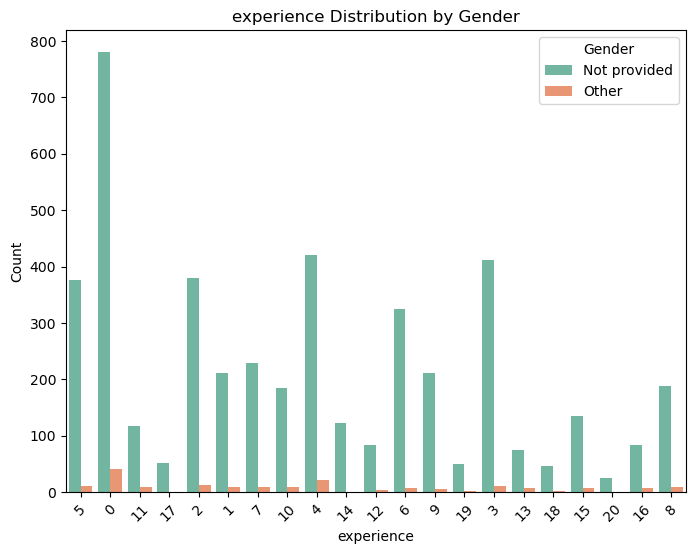

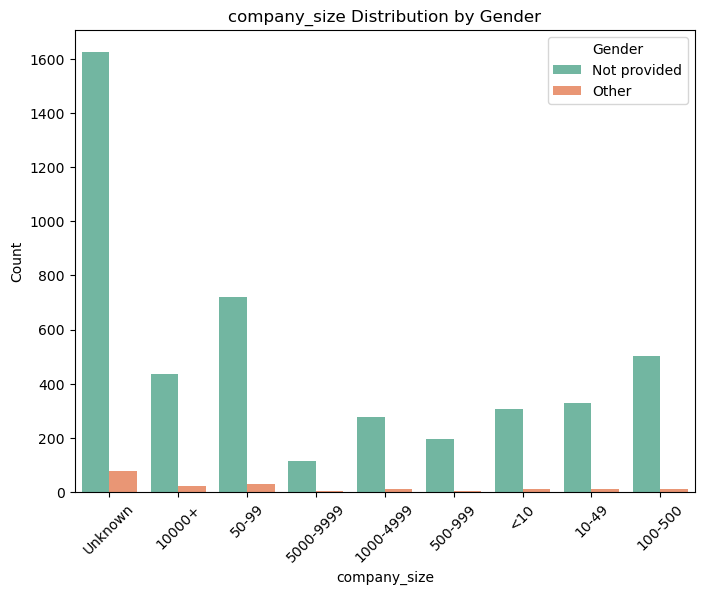

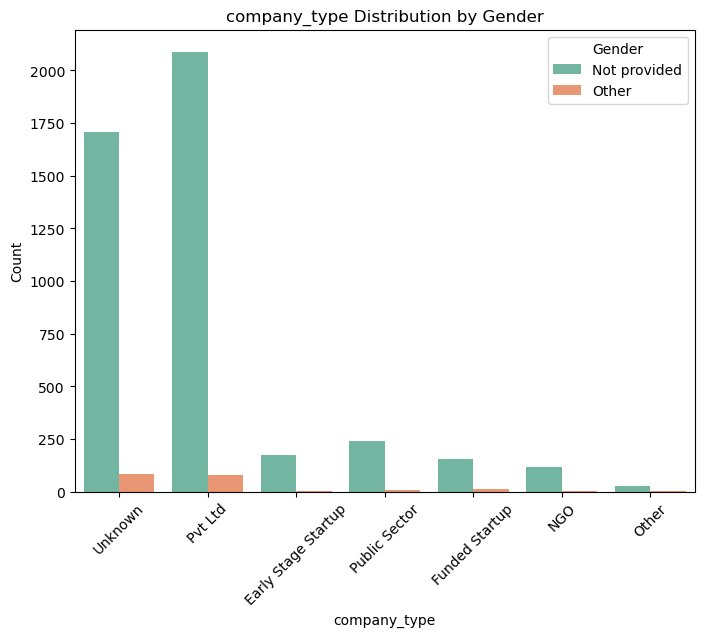

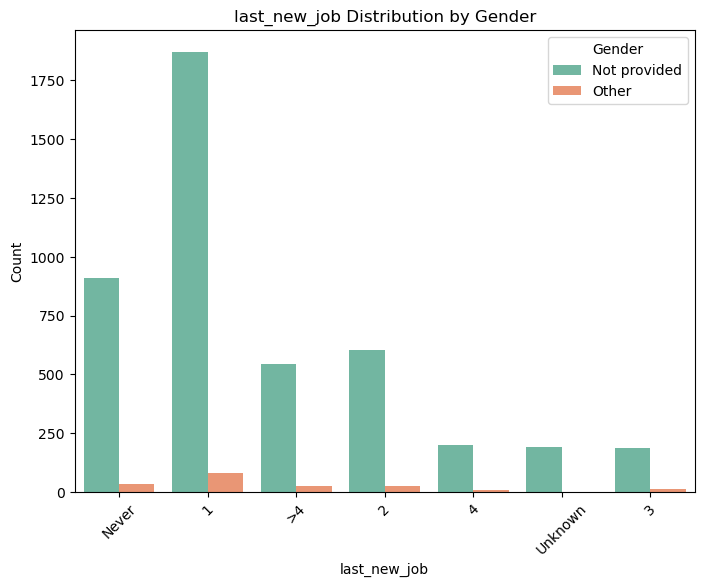

In [201]:
print('수치형 데이터 시각화')
# 수치형 데이터 시각화
for column in group_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_gender, x=column, hue='gender', multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by Gender')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Gender', labels=['Other', 'Not provided'])
    plt.show()

print('범주형 데이터 시각화')
# 범주형 데이터 시각화
for column in group_obj:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=aug_train_gender, x=column, hue='gender', palette='Set2')
    plt.title(f'{column} Distribution by Gender')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Gender', labels=['Not provided','Other'])
    plt.xticks(rotation=45)  # 범주형 데이터의 레이블이 길 경우 각도를 조정
    plt.show()


In [202]:
# 'gender'가 'Not provided'인 행의 'gender'를 'Other'로 변경
aug_train.loc[aug_train['gender'] == 'Not provided', 'gender'] = 'Other'

In [203]:
aug_train['gender'].value_counts(dropna=False)

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

##### Major variable
- 결측치와 Other이랑 합친다.

In [204]:
aug_train['major_discipline'].fillna('Unknown',inplace=True)

In [205]:
# 필터링 조건 수정: 'Unknown' 또는 'Other'
aug_train_major_discipline = aug_train[(aug_train['major_discipline'] == 'Unknown') | (aug_train['major_discipline'] == 'Other')]
aug_train_major_discipline['major_discipline'].value_counts(dropna= False)


Unknown    2813
Other       381
Name: major_discipline, dtype: int64

In [206]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

수치형 데이터 시각화


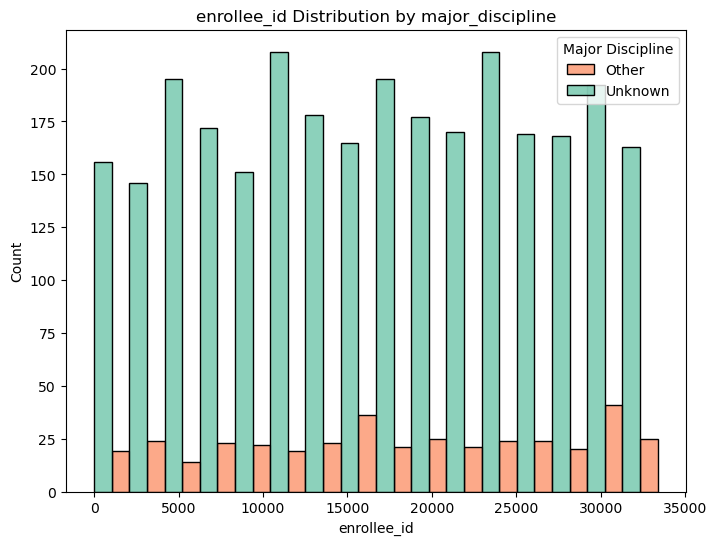

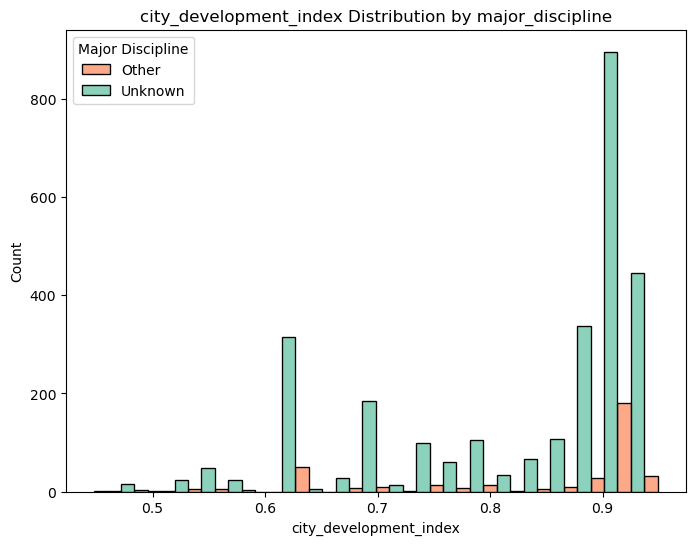

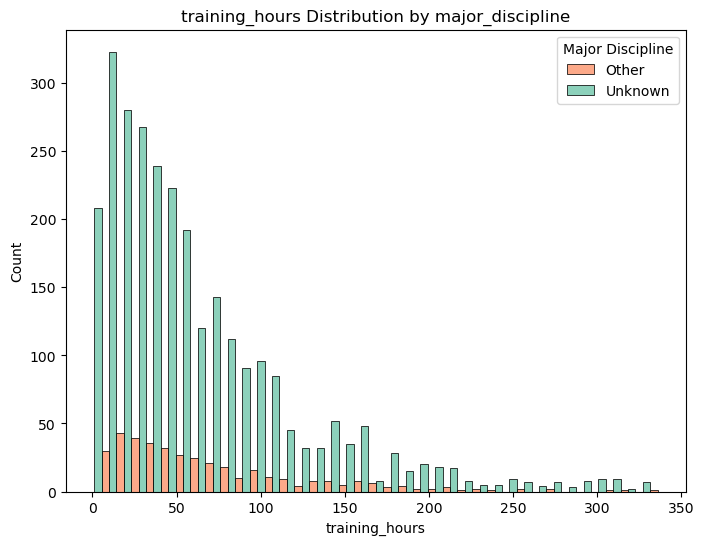

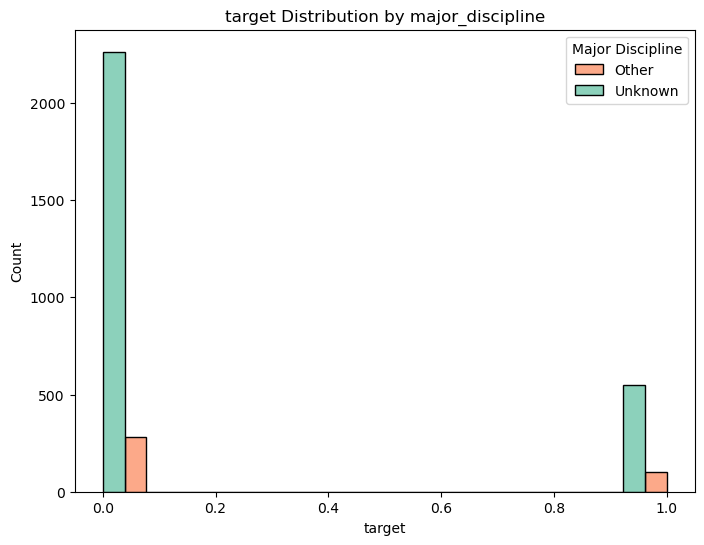

범주형 데이터 시각화


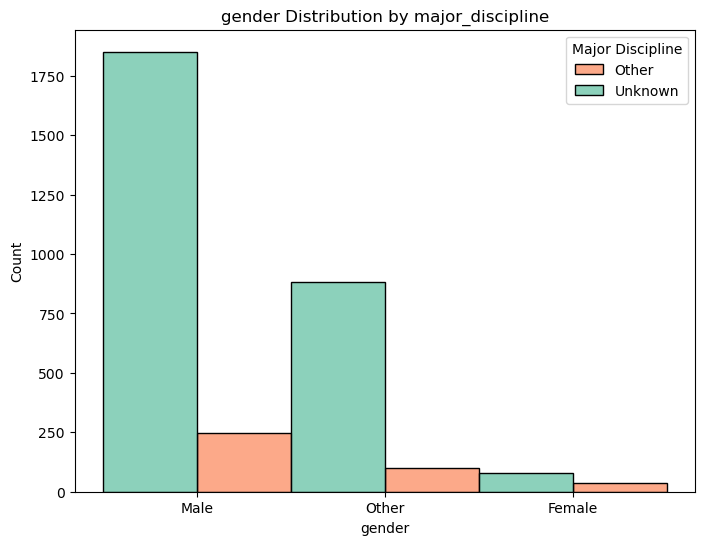

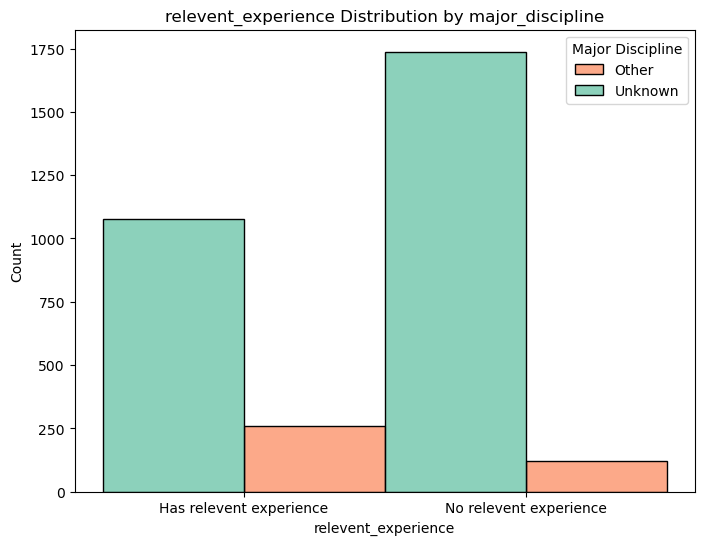

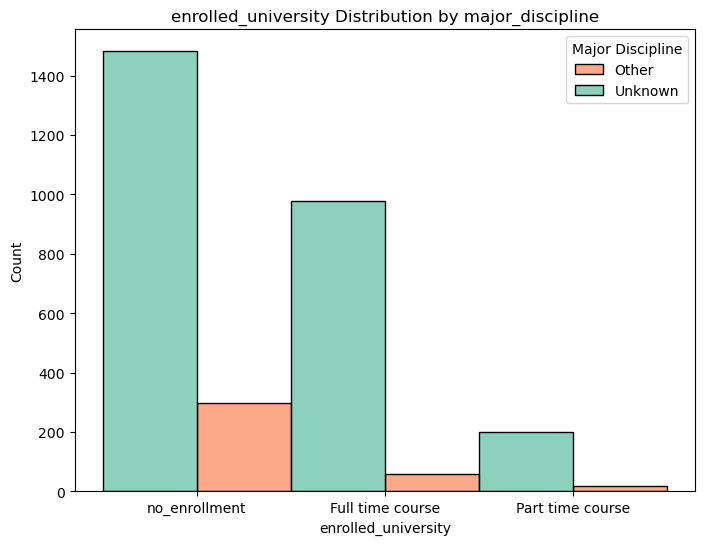

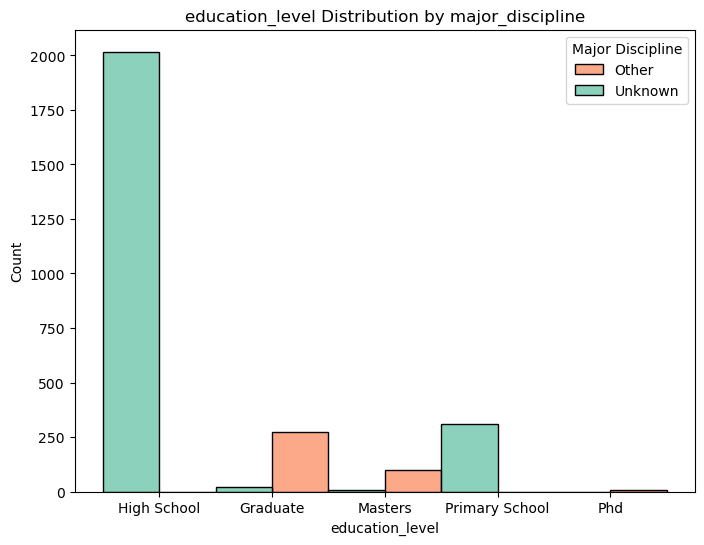

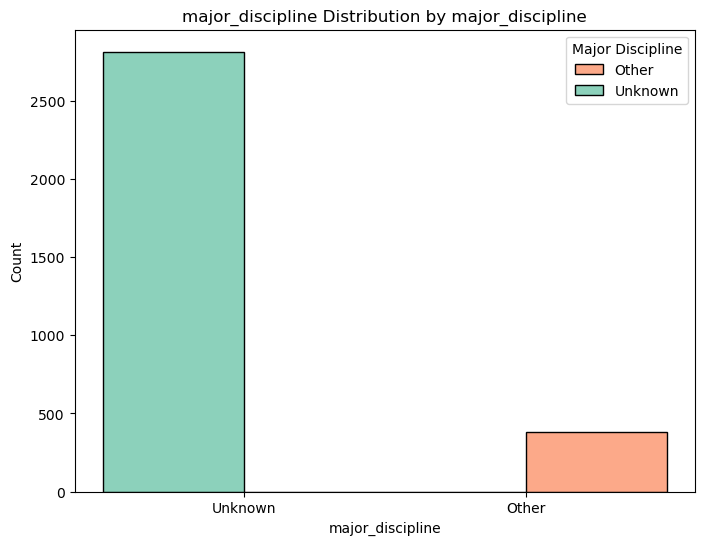

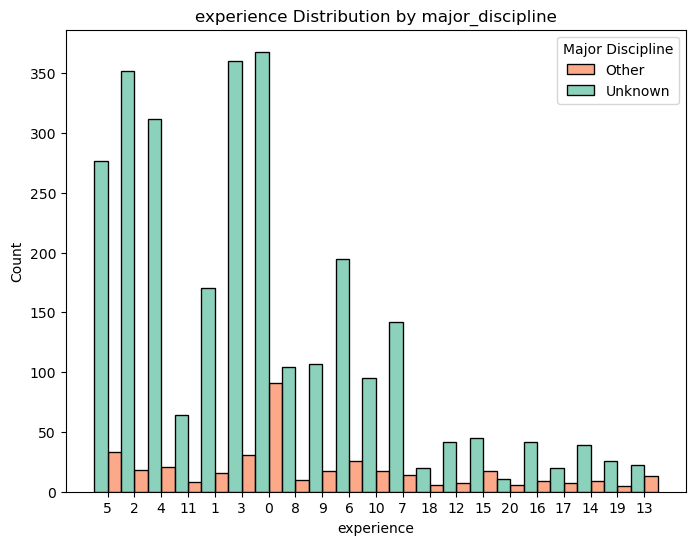

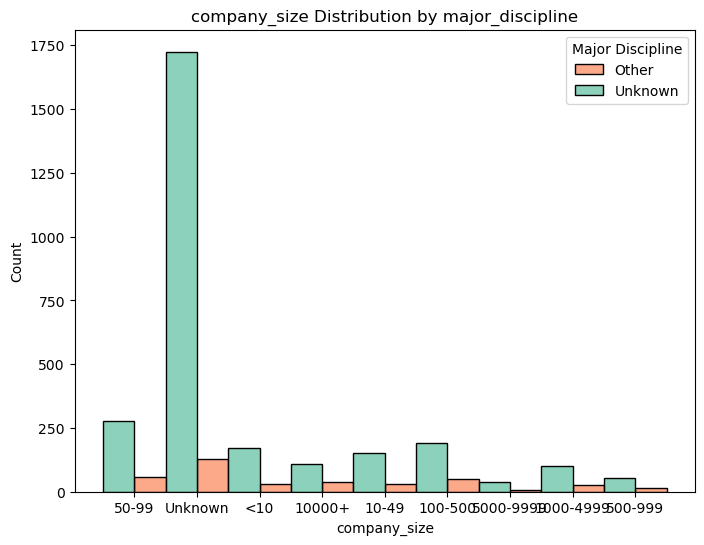

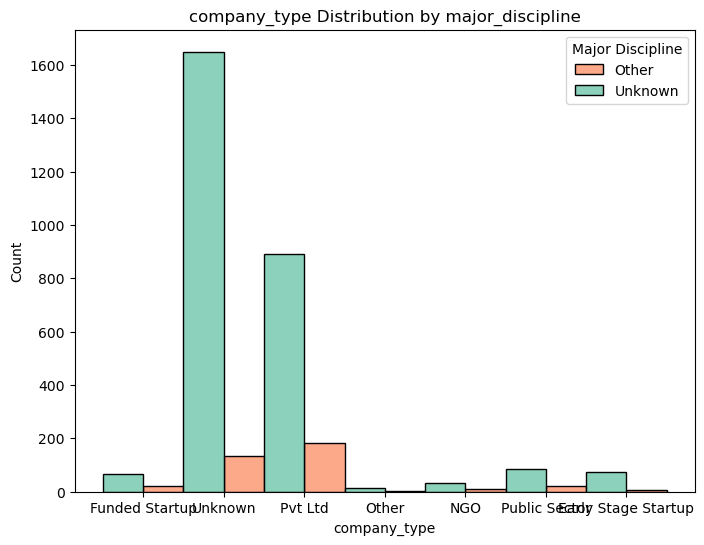

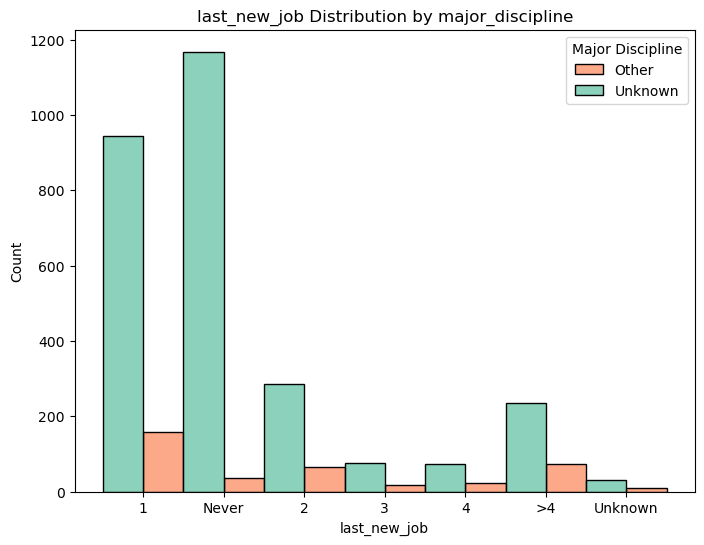

In [207]:
print('수치형 데이터 시각화')
# 수치형 데이터 시각화
for column in group_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_major_discipline, x=column, hue='major_discipline', multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by major_discipline')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Major Discipline', labels=['Other','Unknown'])
    plt.show()

print('범주형 데이터 시각화')
# 범주형 데이터 시각화
for column in group_obj:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_major_discipline, x=column, hue='major_discipline',multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by major_discipline')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Major Discipline', labels=['Other', 'Unknown'])
    plt.show()

In [208]:
# 'Major_Discipline'가 'Unknown'인 행의 'Major_Discipline'를 'Other'로 변경
aug_train.loc[aug_train['major_discipline'] == 'Unknown', 'major_discipline'] = 'Other'

In [209]:
aug_train['major_discipline'].value_counts(dropna=False)

STEM               14492
Other               3194
Humanities           669
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

##### enrolled_university
- 결측치 : NaN                   386개(0.020148, 비율)

In [210]:
aug_train['enrolled_university'].value_counts(dropna=False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [211]:
aug_train['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [212]:
aug_train[aug_train['education_level'].isnull()]['enrolled_university'].value_counts(dropna=False)

no_enrollment       270
NaN                 100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

In [213]:
### 보기 좋게만 만들기
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/3339035232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer


In [214]:
aug_train['enrolled_university'].fillna("Unknown", inplace=True)

In [215]:
aug_train['enrolled_university'].value_counts(dropna=False)

No Enrollment       13817
Full time course     3757
Part time course     1198
Unknown               386
Name: enrolled_university, dtype: int64

##### education_level           0.024011

In [216]:
aug_train['education_level'].value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [217]:
aug_train[aug_train['enrolled_university']=='Unknown']['education_level'].value_counts(dropna=False)

Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [218]:
aug_train.loc[aug_train['enrolled_university']=='no_enrollment','education_level'].value_counts(dropna=False)

Series([], Name: education_level, dtype: int64)

In [219]:
aug_train[aug_train['enrolled_university']=='No Enrollment']['education_level'].value_counts(dropna=False)

Graduate          8434
Masters           3547
High School        940
Phd                371
NaN                270
Primary School     255
Name: education_level, dtype: int64

In [220]:
aug_train['education_level'].fillna("Unknown", inplace=True)

In [221]:
aug_train['education_level'].value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
Unknown             460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

##### 결측치 있는 행 제거
- 결측치 보완하고 나서 2% 정도 남은 결측치들의 id를 보자.

In [222]:
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
experience_over_20        0.0
experience_Unknown        0.0
dtype: float64

In [223]:
# Checking the number of rows with NaN values
nan_rows = aug_train.isna().sum(axis=1)
num_nan_rows = (nan_rows > 0).sum()

print('결측치',num_nan_rows,'개',(num_nan_rows)/len(aug_train),"%")
### 결측치 995 개 0.05193652782127571 % ... 킹받는다.. ㅎㅎㅋㅋ

결측치 0 개 0.0 %


In [224]:
# I will drop the remaining missing data
aug_train.dropna(inplace=True)
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
experience_over_20        0.0
experience_Unknown        0.0
dtype: float64

##### 정수형으로 만들기

In [225]:
# Converting objects to integers
aug_train['experience'] = aug_train['experience'].astype(str).astype(int)
aug_train['training_hours'] = aug_train['training_hours'].astype(str).astype(int)
aug_train['target'] = aug_train['target'].astype(int)

##### 변수 value 임의의 순서로 지정하기

In [226]:
for column in aug_train.columns:
    print(f"{column} unique values: {aug_train[column].unique()}\n")

enrollee_id unique values: [ 8949 29725 11561 ... 24576  5756 23834]

city_development_index unique values: [0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]

gender unique values: ['Male' 'Other' 'Female']

relevent_experience unique values: ['Has relevent experience' 'No relevent experience']

enrolled_university unique values: ['No Enrollment' 'Full time course' 'Unknown' 'Part time course']

education_level unique values: ['Graduate' 'Masters' 'High School' 'Unknown' 'Phd' 'Pr

In [227]:
# Orders
ed_order = ['Primary School','High School','Graduate','Masters','Phd','Unknown']
enroll_order = ['No Enrollment','Part time course','Full time course','Unknown']
disc_order = ['STEM','Humanities','Business Degree','Arts','Other','No Major','Unknown']
exp_yrs_order = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
exp_yrs_order_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+','Unknown']
job_order = ['Never', '1', '2', '3', '4', '>4','Unknown']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Funded Startup','Public Sector','Early Stage Startup','NGO','Other','Unknown']

이 코드는 aug_train 데이터프레임을 사용하여 교육 수준(education_level)과 마지막 직업 변경 시기(last_new_job)에 따른 직업 경험(experience)을 분석하고, 직업을 찾는 사람과 그렇지 않은 사람의 비율을 비교하기 위해 데이터를 정규화하고 요약하는 과정을 포함하고 있습니다.

In [228]:
job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]
jc_never = job_change['Never']

job_change_norm = pd.crosstab(aug_train['education_level'],aug_train['last_new_job'],normalize='columns').loc[ed_order,job_order,]
job_change_norm = round(job_change_norm*100,1).astype(int)

##
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

seekers_job_change_norm = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['last_new_job'],normalize='columns').loc[ed_order,job_order,]
seekers_job_change_norm = round(seekers_job_change_norm*100,1).astype(int)
seekers_job_change_norm

non_seekers_job_change_norm = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['last_new_job'],normalize='columns').loc[ed_order,job_order,]
non_seekers_job_change_norm = round(non_seekers_job_change_norm*100,1).astype(int)

#### 전처리 다하고 EDA 시작하기 전에, train, val, test 셋 분리하는 코드

In [229]:
from sklearn.model_selection import train_test_split

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

# train, val, test 셋 분리하는 코드
# 데이터셋 분할: Train/Validation + Test
X_train_val_df, X_test_df, y_train_val_df, y_test_df = train_test_split(X, y, test_size=0.2, random_state=80)
# 데이터셋 분할: Train + Validation
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X, y, test_size=0.2, random_state=80)

In [230]:
# 열 이름 설정
feature_columns = aug_train.drop(columns=['target']).columns
target_column = ['target']

# numpy 배열을 DataFrame으로 변환
X_train_df = pd.DataFrame(X_train_val_df, columns=feature_columns)
X_val_df = pd.DataFrame(X_val_df, columns=feature_columns)
X_test_df = pd.DataFrame(X_test_df, columns=feature_columns)
y_train_df = pd.DataFrame(y_train_val_df, columns=target_column)
y_val_df = pd.DataFrame(y_val_df, columns=target_column)
y_test_df = pd.DataFrame(y_test_df, columns=target_column)

# Ensure 'train_df' and 'test_df' are created correctly by concatenating X and y
# train_df : for visuals
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_val_df, y_val_df], axis=1)

# 출력 확인
print(train_df.info())
print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             15326 non-null  object
 1   city_development_index  15326 non-null  object
 2   gender                  15326 non-null  object
 3   relevent_experience     15326 non-null  object
 4   enrolled_university     15326 non-null  object
 5   education_level         15326 non-null  object
 6   major_discipline        15326 non-null  object
 7   experience              15326 non-null  object
 8   company_size            15326 non-null  object
 9   company_type            15326 non-null  object
 10  last_new_job            15326 non-null  object
 11  training_hours          15326 non-null  object
 12  experience_over_20      15326 non-null  object
 13  experience_Unknown      15326 non-null  object
 14  target                  15326 non-null  int64 
dtypes:

In [231]:
train_df

enrollee_id city_development_index gender      relevent_experience  \
0            7681                  0.762   Male  Has relevent experience   
1           16002                   0.92  Other  Has relevent experience   
2           30441                   0.92   Male  Has relevent experience   
3            8442                  0.855  Other  Has relevent experience   
4           20955                  0.898   Male   No relevent experience   
...           ...                    ...    ...                      ...   
15321       17479                  0.624   Male  Has relevent experience   
15322       25387                   0.92  Other   No relevent experience   
15323       25448                  0.727   Male  Has relevent experience   
15324        9788                   0.91   Male  Has relevent experience   
15325        2767                  0.939   Male   No relevent experience   

      enrolled_university education_level major_discipline experience  \
0           No Enrollment        Graduate             STEM          9   
1           No Enrollment         Masters             STEM          8   
2           No Enrollment        Graduate       Humanities         19   
3           No Enrollment        Graduate             STEM          5   
4        Full time course        Graduate             STEM          3   
...                   ...             ...              ...        ...   
15321       No Enrollment        Graduate             STEM          9   
15322    Full time course        Graduate             STEM          0   
15323    Full time course        Graduate             STEM          7   
15324       No Enrollment        Graduate             STEM         14   
15325    Full time course        Graduate             STEM         15   

      company_size    company_type last_new_job training_hours  \
0          Unknown         Unknown           >4             70   
1            50-99         Pvt Ltd            4             79   
2          100-500         Pvt Ltd           >4             90   
3          Unknown         Unknown            1             54   
4          Unknown         Unknown            1              8   
...            ...             ...          ...            ...   
15321      Unknown         Unknown        Never            133   
15322      Unknown         Unknown        Never              2   
15323      Unknown         Unknown           >4             24   
15324        10-49  Funded Startup            1             26   
15325    1000-4999             NGO            1             25   

      experience_over_20 experience_Unknown  target  
0                      0                  0       0  
1                      0                  0       0  
2                      0                  0       0  
3                      0                  0       0  
4                      0                  0       0  
...                  ...                ...     ...  
15321                  0                  0       1  
15322                  0                  0       0  
15323                  0                  0       0  
15324                  0                  0       0  
15325                  0                  0       0  

[15326 rows x 15 columns]

- 날려야 할 것들
    - enrollee_id
- 수치형으로 바꿔야 할 것들
    - city_development_index, experience, training_hours
- 더미화 시켜야 할 것들
    - gender, relevent_experience, enrolled_university, education_level, major_discipline, company_size, company_type, last_new_job

In [232]:
train_df['experience'] = train_df['experience'].astype(str).astype(int)
train_df['city_development_index'] = train_df['city_development_index'].astype(str).astype(float)
train_df['training_hours'] = train_df['training_hours'].astype(str).astype(int)

pip install scikit-learn==1.1
pip install imbalanced-learn==0.9

In [233]:
list_of_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                   'major_discipline', 'company_size', 'company_type', 'last_new_job']

train_dummies_df = []

for col in list_of_columns:
    dummy_train_df = pd.get_dummies(train_df[col])
    train_dummies_df.append(dummy_train_df)


list_of_columns.append('enrollee_id')    
train_dummies_df.insert(0, train_df.drop(columns=list_of_columns))

train_df = pd.concat(train_dummies_df,axis=1)

# Final look at our df
train_df.head(3)

city_development_index  experience  training_hours experience_over_20  \
0                   0.762           9              70                  0   
1                   0.920           8              79                  0   
2                   0.920          19              90                  0   

  experience_Unknown  target  Female  Male  Other  Has relevent experience  \
0                  0       0       0     1      0                        1   
1                  0       0       0     0      1                        1   
2                  0       0       0     1      0                        1   

   ...  Public Sector  Pvt Ltd  Unknown  1  2  3  4  >4  Never  Unknown  
0  ...              0        0        1  0  0  0  0   1      0        0  
1  ...              0        1        0  0  0  0  1   0      0        0  
2  ...              0        1        0  0  0  0  0   1      0        0  

[3 rows x 50 columns]

In [234]:
# Extra libs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, r2_score, confusion_matrix
from sklearn.svm import LinearSVC
#from imblearn.over_sampling import BorderlineSMOTE
from numpy import where

# Modelling

### Linear SVM

In [235]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 데이터 준비
X = train_df.dropna().drop(columns=['target']).values
y = train_df.dropna()['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

# Define scalers and samplers
scalers = [None, StandardScaler(), MinMaxScaler(), RobustScaler()]
samplers = [None, SMOTE(), ADASYN(), BorderlineSMOTE()]

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', LinearSVC(dual=False, random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'LinearSVC',
                'Scaler': scaler.__class__.__name__ if scaler is not None else 'None',
                'Sampler': sampler.__class__.__name__ if sampler is not None else 'None',
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler.__class__.__name__ if scaler else 'None'} and sampler {sampler.__class__.__name__ if sampler else 'None'}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


Model          Scaler          Sampler  Accuracy    Recall  Precision  \
0   LinearSVC            None             None  0.761853  0.242531   0.542240   
1   LinearSVC            None            SMOTE  0.729230  0.746046   0.470360   
2   LinearSVC            None           ADASYN  0.724228  0.741652   0.464246   
3   LinearSVC            None  BorderlineSMOTE  0.723793  0.745167   0.463895   
4   LinearSVC  StandardScaler             None  0.761635  0.242531   0.541176   
5   LinearSVC  StandardScaler            SMOTE  0.727925  0.739895   0.468559   
6   LinearSVC  StandardScaler           ADASYN  0.720531  0.747803   0.460249   
7   LinearSVC  StandardScaler  BorderlineSMOTE  0.727055  0.751318   0.467980   
8   LinearSVC    MinMaxScaler             None  0.761853  0.242531   0.542240   
9   LinearSVC    MinMaxScaler            SMOTE  0.727925  0.728471   0.468097   
10  LinearSVC    MinMaxScaler           ADASYN  0.720096  0.736380   0.459178   
11  LinearSVC    MinMaxScaler  BorderlineSMOTE  0.724880  0.743409   0.465091   
12  LinearSVC    RobustScaler             None  0.761635  0.242531   0.541176   
13  LinearSVC    RobustScaler            SMOTE  0.726403  0.735501   0.466555   
14  LinearSVC    RobustScaler           ADASYN  0.718138  0.743409   0.457297   
15  LinearSVC    RobustScaler  BorderlineSMOTE  0.723358  0.760105   0.464056   

    ROC AUC Score  F1 Score  
0        0.587595  0.335155  
1        0.734873  0.576962  
2        0.730075  0.571042  
3        0.730965  0.571814  
4        0.587450  0.334951  
5        0.731941  0.573765  
6        0.729682  0.569802  
7        0.735197  0.576728  
8        0.587595  0.335155  
9        0.728108  0.569955  
10       0.725560  0.565643  
11       0.731098  0.572202  
12       0.587450  0.334951  
13       0.729456  0.570941  
14       0.726618  0.566265  
15       0.735689  0.576282

### Support Vector Machine

#### sigmoid

In [236]:
from sklearn.svm import SVC

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', SVC(kernel='sigmoid', random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'SVC (Sigmoid Kernel)',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df

Model          Scaler          Sampler  Accuracy    Recall  \
0              LinearSVC            None             None  0.761853  0.242531   
1              LinearSVC            None            SMOTE  0.729230  0.746046   
2              LinearSVC            None           ADASYN  0.724228  0.741652   
3              LinearSVC            None  BorderlineSMOTE  0.723793  0.745167   
4              LinearSVC  StandardScaler             None  0.761635  0.242531   
5              LinearSVC  StandardScaler            SMOTE  0.727925  0.739895   
6              LinearSVC  StandardScaler           ADASYN  0.720531  0.747803   
7              LinearSVC  StandardScaler  BorderlineSMOTE  0.727055  0.751318   
8              LinearSVC    MinMaxScaler             None  0.761853  0.242531   
9              LinearSVC    MinMaxScaler            SMOTE  0.727925  0.728471   
10             LinearSVC    MinMaxScaler           ADASYN  0.720096  0.736380   
11             LinearSVC    MinMaxScaler  BorderlineSMOTE  0.724880  0.743409   
12             LinearSVC    RobustScaler             None  0.761635  0.242531   
13             LinearSVC    RobustScaler            SMOTE  0.726403  0.735501   
14             LinearSVC    RobustScaler           ADASYN  0.718138  0.743409   
15             LinearSVC    RobustScaler  BorderlineSMOTE  0.723358  0.760105   
16  SVC (Sigmoid Kernel)            None             None  0.641366  0.272408   
17  SVC (Sigmoid Kernel)            None            SMOTE  0.519574  0.528120   
18  SVC (Sigmoid Kernel)            None           ADASYN  0.521096  0.521090   
19  SVC (Sigmoid Kernel)            None  BorderlineSMOTE  0.514137  0.535149   
20  SVC (Sigmoid Kernel)  StandardScaler             None  0.711396  0.312830   
21  SVC (Sigmoid Kernel)  StandardScaler            SMOTE  0.631144  0.661687   
22  SVC (Sigmoid Kernel)  StandardScaler           ADASYN  0.636146  0.669596   
23  SVC (Sigmoid Kernel)  StandardScaler  BorderlineSMOTE  0.640713  0.667838   
24  SVC (Sigmoid Kernel)    MinMaxScaler             None  0.707047  0.369069   
25  SVC (Sigmoid Kernel)    MinMaxScaler            SMOTE  0.555459  0.543937   
26  SVC (Sigmoid Kernel)    MinMaxScaler           ADASYN  0.539147  0.543058   
27  SVC (Sigmoid Kernel)    MinMaxScaler  BorderlineSMOTE  0.617007  0.614236   
28  SVC (Sigmoid Kernel)    RobustScaler             None  0.685515  0.340949   
29  SVC (Sigmoid Kernel)    RobustScaler            SMOTE  0.583080  0.581722   
30  SVC (Sigmoid Kernel)    RobustScaler           ADASYN  0.564593  0.582601   
31  SVC (Sigmoid Kernel)    RobustScaler  BorderlineSMOTE  0.582210  0.589631   

    Precision  ROC AUC Score  F1 Score  
0    0.542240       0.587595  0.335155  
1    0.470360       0.734873  0.576962  
2    0.464246       0.730075  0.571042  
3    0.463895       0.730965  0.571814  
4    0.541176       0.587450  0.334951  
5    0.468559       0.731941  0.573765  
6    0.460249       0.729682  0.569802  
7    0.467980       0.735197  0.576728  
8    0.542240       0.587595  0.335155  
9    0.468097       0.728108  0.569955  
10   0.459178       0.725560  0.565643  
11   0.465091       0.731098  0.572202  
12   0.541176       0.587450  0.334951  
13   0.466555       0.729456  0.570941  
14   0.457297       0.726618  0.566265  
15   0.464056       0.735689  0.576282  
16   0.274094       0.517562  0.273248  
17   0.264408       0.522441  0.352389  
18   0.263556       0.521094  0.350059  
19   0.263181       0.521187  0.352839  
20   0.395117       0.577658  0.349191  
21   0.364826       0.641393  0.470331  
22   0.370083       0.647370  0.476697  
23   0.373648       0.649815  0.479193  
24   0.400381       0.593638  0.384088  
25   0.288713       0.551593  0.377209  
26   0.278755       0.540460  0.368405  
27   0.345868       0.616077  0.442545  
28   0.357934       0.569896  0.349235  
29   0.314788       0.582624  0.408516  
30   0.302740       0.570636  0.398438  
31   0.315765       0.584700  0.4

#### poly

In [237]:
from sklearn.svm import SVC

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', SVC(kernel='poly', random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'SVC (Poly Kernel)',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df

/Users/juwonjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model          Scaler          Sampler  Accuracy    Recall  \
0              LinearSVC            None             None  0.761853  0.242531   
1              LinearSVC            None            SMOTE  0.729230  0.746046   
2              LinearSVC            None           ADASYN  0.724228  0.741652   
3              LinearSVC            None  BorderlineSMOTE  0.723793  0.745167   
4              LinearSVC  StandardScaler             None  0.761635  0.242531   
5              LinearSVC  StandardScaler            SMOTE  0.727925  0.739895   
6              LinearSVC  StandardScaler           ADASYN  0.720531  0.747803   
7              LinearSVC  StandardScaler  BorderlineSMOTE  0.727055  0.751318   
8              LinearSVC    MinMaxScaler             None  0.761853  0.242531   
9              LinearSVC    MinMaxScaler            SMOTE  0.727925  0.728471   
10             LinearSVC    MinMaxScaler           ADASYN  0.720096  0.736380   
11             LinearSVC    MinMaxScaler  BorderlineSMOTE  0.724880  0.743409   
12             LinearSVC    RobustScaler             None  0.761635  0.242531   
13             LinearSVC    RobustScaler            SMOTE  0.726403  0.735501   
14             LinearSVC    RobustScaler           ADASYN  0.718138  0.743409   
15             LinearSVC    RobustScaler  BorderlineSMOTE  0.723358  0.760105   
16  SVC (Sigmoid Kernel)            None             None  0.641366  0.272408   
17  SVC (Sigmoid Kernel)            None            SMOTE  0.519574  0.528120   
18  SVC (Sigmoid Kernel)            None           ADASYN  0.521096  0.521090   
19  SVC (Sigmoid Kernel)            None  BorderlineSMOTE  0.514137  0.535149   
20  SVC (Sigmoid Kernel)  StandardScaler             None  0.711396  0.312830   
21  SVC (Sigmoid Kernel)  StandardScaler            SMOTE  0.631144  0.661687   
22  SVC (Sigmoid Kernel)  StandardScaler           ADASYN  0.636146  0.669596   
23  SVC (Sigmoid Kernel)  StandardScaler  BorderlineSMOTE  0.640713  0.667838   
24  SVC (Sigmoid Kernel)    MinMaxScaler             None  0.707047  0.369069   
25  SVC (Sigmoid Kernel)    MinMaxScaler            SMOTE  0.555459  0.543937   
26  SVC (Sigmoid Kernel)    MinMaxScaler           ADASYN  0.539147  0.543058   
27  SVC (Sigmoid Kernel)    MinMaxScaler  BorderlineSMOTE  0.617007  0.614236   
28  SVC (Sigmoid Kernel)    RobustScaler             None  0.685515  0.340949   
29  SVC (Sigmoid Kernel)    RobustScaler            SMOTE  0.583080  0.581722   
30  SVC (Sigmoid Kernel)    RobustScaler           ADASYN  0.564593  0.582601   
31  SVC (Sigmoid Kernel)    RobustScaler  BorderlineSMOTE  0.582210  0.589631   
32     SVC (Poly Kernel)            None             None  0.752501  0.000000   
33     SVC (Poly Kernel)            None            SMOTE  0.339060  0.930580   
34     SVC (Poly Kernel)            None           ADASYN  0.742497  0.090510   
35     SVC (Poly Kernel)            None  BorderlineSMOTE  0.337321  0.936731   
36     SVC (Poly Kernel)  StandardScaler             None  0.760113  0.242531   
37     SVC (Poly Kernel)  StandardScaler            SMOTE  0.720531  0.746046   
38     SVC (Poly Kernel)  StandardScaler           ADASYN  0.711831  0.756591   
39     SVC (Poly Kernel)  StandardScaler  BorderlineSMOTE  0.716833  0.752197   
40     SVC (Poly Kernel)    MinMaxScaler             None  0.764898  0.289982   
41     SVC (Poly Kernel)    MinMaxScaler            SMOTE  0.728143  0.756591   
42     SVC (Poly Kernel)    MinMaxScaler           ADASYN  0.721836  0.767135   
43     SVC (Poly Kernel)    MinMaxScaler  BorderlineSMOTE  0.720966  0.756591   
44     SVC (Poly Kernel)    RobustScaler             None  0.767508  0.349736   
45     SVC (Poly Kernel)    RobustScaler            SMOTE  0.751196  0.742531   
46     SVC (Poly Kernel)    RobustScaler           ADASYN  0.742279  0.752197   
47     SVC (Poly Kernel)    RobustScaler  BorderlineSMOTE  0.743149  0.743409   

    Precision  ROC AUC Score  F1 Score  
0    0.5

#### rbf

In [238]:
from sklearn.svm import SVC

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', SVC(kernel='rbf', random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'SVC (RBF Kernel)',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

/Users/juwonjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model          Scaler          Sampler  Accuracy    Recall  \
47  SVC (Poly Kernel)    RobustScaler  BorderlineSMOTE  0.743149  0.743409   
48   SVC (RBF Kernel)            None             None  0.752501  0.000000   
49   SVC (RBF Kernel)            None            SMOTE  0.678121  0.506151   
50   SVC (RBF Kernel)            None           ADASYN  0.695085  0.476274   
51   SVC (RBF Kernel)            None  BorderlineSMOTE  0.637234  0.567663   
52   SVC (RBF Kernel)  StandardScaler             None  0.765333  0.268014   
53   SVC (RBF Kernel)  StandardScaler            SMOTE  0.734232  0.727592   
54   SVC (RBF Kernel)  StandardScaler           ADASYN  0.722488  0.740773   
55   SVC (RBF Kernel)  StandardScaler  BorderlineSMOTE  0.726403  0.731107   
56   SVC (RBF Kernel)    MinMaxScaler             None  0.762723  0.223199   
57   SVC (RBF Kernel)    MinMaxScaler            SMOTE  0.737712  0.739016   
58   SVC (RBF Kernel)    MinMaxScaler           ADASYN  0.730753  0.742531   
59   SVC (RBF Kernel)    MinMaxScaler  BorderlineSMOTE  0.732492  0.744288   
60   SVC (RBF Kernel)    RobustScaler             None  0.770335  0.359402   
61   SVC (RBF Kernel)    RobustScaler            SMOTE  0.754023  0.735501   
62   SVC (RBF Kernel)    RobustScaler           ADASYN  0.747499  0.731986   
63   SVC (RBF Kernel)    RobustScaler  BorderlineSMOTE  0.746629  0.741652   

    Precision  ROC AUC Score  F1 Score  
47   0.487608       0.743237  0.588931  
48   0.000000       0.500000  0.000000  
49   0.385542       0.620417  0.437690  
50   0.402077       0.621663  0.436042  
51   0.354555       0.613889  0.436486  
52   0.553539       0.598458  0.361160  
53   0.475862       0.732004  0.575400  
54   0.462171       0.728624  0.569210  
55   0.466368       0.727981  0.569473  
56   0.550976       0.581686  0.317699  
57   0.480571       0.738150  0.582410  
58   0.472067       0.734705  0.577186  
59   0.474244       0.736450  0.579343  
60   0.555707       0.632447  0.436499  
61   0.502100       0.747808  0.596791  
62   0.493191       0.742294  0.589317  
63   0.492128       0.744959  0.591658

### Decision Tree

In [239]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', DecisionTreeClassifier(random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Decision Tree',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
63  SVC (RBF Kernel)    RobustScaler  BorderlineSMOTE  0.746629  0.741652   
64     Decision Tree            None             None  0.711396  0.441125   
65     Decision Tree            None            SMOTE  0.700957  0.456063   
66     Decision Tree            None           ADASYN  0.716833  0.454306   
67     Decision Tree            None  BorderlineSMOTE  0.714659  0.449033   
68     Decision Tree  StandardScaler             None  0.711396  0.441125   
69     Decision Tree  StandardScaler            SMOTE  0.711396  0.499121   
70     Decision Tree  StandardScaler           ADASYN  0.706177  0.486819   
71     Decision Tree  StandardScaler  BorderlineSMOTE  0.716616  0.501757   
72     Decision Tree    MinMaxScaler             None  0.710091  0.440246   
73     Decision Tree    MinMaxScaler            SMOTE  0.703567  0.480668   
74     Decision Tree    MinMaxScaler           ADASYN  0.704437  0.480668   
75     Decision Tree    MinMaxScaler  BorderlineSMOTE  0.713136  0.476274   
76     Decision Tree    RobustScaler             None  0.710744  0.439367   
77     Decision Tree    RobustScaler            SMOTE  0.704219  0.473638   
78     Decision Tree    RobustScaler           ADASYN  0.706829  0.445518   
79     Decision Tree    RobustScaler  BorderlineSMOTE  0.709656  0.482425   

    Precision  ROC AUC Score  F1 Score  
63   0.492128       0.744959  0.591658  
64   0.420788       0.620707  0.430716  
65   0.407059       0.618783  0.430170  
66   0.431553       0.628742  0.442637  
67   0.427258       0.625528  0.437875  
68   0.420788       0.620707  0.430716  
69   0.428679       0.640168  0.461226  
70   0.419379       0.632571  0.450590  
71   0.436878       0.644520  0.467076  
72   0.418546       0.619545  0.429122  
73   0.414708       0.628773  0.445258  
74   0.415970       0.629351  0.445985  
75   0.428458       0.633657  0.451103  
76   0.419463       0.619684  0.429185  
77   0.414615       0.626848  0.442166  
78   0.414216       0.619147  0.429297  
79   0.423938       0.633409  0.451295

### Random Forest

In [240]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', RandomForestClassifier(n_estimators=600)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Random Forest',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
79  Decision Tree    RobustScaler  BorderlineSMOTE  0.709656  0.482425   
80  Random Forest            None             None  0.779687  0.450791   
81  Random Forest            None            SMOTE  0.775990  0.461336   
82  Random Forest            None           ADASYN  0.774685  0.453427   
83  Random Forest            None  BorderlineSMOTE  0.777512  0.462214   
84  Random Forest  StandardScaler             None  0.775120  0.450791   
85  Random Forest  StandardScaler            SMOTE  0.776207  0.554482   
86  Random Forest  StandardScaler           ADASYN  0.768160  0.557118   
87  Random Forest  StandardScaler  BorderlineSMOTE  0.770117  0.557996   
88  Random Forest    MinMaxScaler             None  0.778599  0.450791   
89  Random Forest    MinMaxScaler            SMOTE  0.772292  0.562390   
90  Random Forest    MinMaxScaler           ADASYN  0.767508  0.571178   
91  Random Forest    MinMaxScaler  BorderlineSMOTE  0.769247  0.565026   
92  Random Forest    RobustScaler             None  0.781209  0.453427   
93  Random Forest    RobustScaler            SMOTE  0.776425  0.551845   
94  Random Forest    RobustScaler           ADASYN  0.776207  0.551845   
95  Random Forest    RobustScaler  BorderlineSMOTE  0.772945  0.549209   

    Precision  ROC AUC Score  F1 Score  
79   0.423938       0.633409  0.451295  
80   0.569367       0.669326  0.503188  
81   0.557325       0.670408  0.504808  
82   0.554839       0.666887  0.499033  
83   0.561366       0.671714  0.506988  
84   0.556399       0.666291  0.498058  
85   0.547268       0.701807  0.550851  
86   0.530100       0.697345  0.543273  
87   0.534062       0.698940  0.545767  
88   0.566225       0.668604  0.501957  
89   0.538267       0.701860  0.550064  
90   0.528026       0.701629  0.548755  
91   0.531844       0.700721  0.547934  
92   0.573333       0.671222  0.506379  
93   0.547993       0.701067  0.549912  
94   0.547515       0.700923  0.549672  
95   0.540657       0.697870  0.544900

In [ ]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', RandomForestClassifier(random_state=0, n_estimators= 800, criterion = 'gini', max_features = 'sqrt', max_depth = 8)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Tuned Random Forest',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
95         Random Forest    RobustScaler  BorderlineSMOTE  0.787974  0.537094   
96   Tuned Random Forest            None             None  0.769473  0.107419   
97   Tuned Random Forest            None            SMOTE  0.791859  0.705564   
98   Tuned Random Forest            None           ADASYN  0.790194  0.704791   
99   Tuned Random Forest            None  BorderlineSMOTE  0.792044  0.710201   
100  Tuned Random Forest  StandardScaler             None  0.769473  0.107419   
101  Tuned Random Forest  StandardScaler            SMOTE  0.788344  0.717929   
102  Tuned Random Forest  StandardScaler           ADASYN  0.780574  0.712519   
103  Tuned Random Forest  StandardScaler  BorderlineSMOTE  0.781129  0.713292   
104  Tuned Random Forest    MinMaxScaler             None  0.769473  0.107419   
105  Tuned Random Forest    MinMaxScaler            SMOTE  0.772248  0.744977   
106  Tuned Random Forest    MinMaxScaler           ADASYN  0.771508  0.746522   
107  Tuned Random Forest    MinMaxScaler  BorderlineSMOTE  0.758002  0.758114   
108  Tuned Random Forest    RobustScaler             None  0.769473  0.107419   
109  Tuned Random Forest    RobustScaler            SMOTE  0.778538  0.740340   
110  Tuned Random Forest    RobustScaler           ADASYN  0.765957  0.751932   
111  Tuned Random Forest    RobustScaler  BorderlineSMOTE  0.763737  0.751159   

     Precision  ROC AUC Score  F1 Score  
95    0.559581       0.702018  0.548107  
96    0.604348       0.542642  0.182415  
97    0.550996       0.762293  0.618773  
98    0.548077       0.760934  0.616633  
99    0.550959       0.764003  0.620527  
100   0.604348       0.542642  0.182415  
101   0.543911       0.764219  0.618921  
102   0.531106       0.757257  0.608581  
103   0.531988       0.757887  0.609442  
104   0.604348       0.542642  0.182415  
105   0.516890       0.762904  0.610320  
106   0.515750       0.762947  0.610041  
107   0.496457       0.758040  0.600000  
108   0.604348       0.542642  0.182415  
109   0.526663       0.765451  0.615483  
110   0.507564       0.761152  0.606042  
111   0.504411       0.759428  0.603539

### Logistic Regression

In [241]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', LogisticRegression(max_iter=2000)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Logistic Regression',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
95         Random Forest    RobustScaler  BorderlineSMOTE  0.772945  0.549209   
96   Logistic Regression            None             None  0.761635  0.253954   
97   Logistic Regression            None            SMOTE  0.728143  0.739895   
98   Logistic Regression            None           ADASYN  0.725315  0.749561   
99   Logistic Regression            None  BorderlineSMOTE  0.725968  0.754833   
100  Logistic Regression  StandardScaler             None  0.762940  0.267135   
101  Logistic Regression  StandardScaler            SMOTE  0.729883  0.734622   
102  Logistic Regression  StandardScaler           ADASYN  0.718573  0.750439   
103  Logistic Regression  StandardScaler  BorderlineSMOTE  0.727708  0.748682   
104  Logistic Regression    MinMaxScaler             None  0.763593  0.264499   
105  Logistic Regression    MinMaxScaler            SMOTE  0.730100  0.730228   
106  Logistic Regression    MinMaxScaler           ADASYN  0.720531  0.739895   
107  Logistic Regression    MinMaxScaler  BorderlineSMOTE  0.725098  0.747803   
108  Logistic Regression    RobustScaler             None  0.762723  0.265378   
109  Logistic Regression    RobustScaler            SMOTE  0.726838  0.735501   
110  Logistic Regression    RobustScaler           ADASYN  0.718791  0.745167   
111  Logistic Regression    RobustScaler  BorderlineSMOTE  0.722923  0.750439   

     Precision  ROC AUC Score  F1 Score  
95    0.540657       0.697870  0.544900  
96    0.539179       0.591284  0.345281  
97    0.468820       0.732086  0.573960  
98    0.465866       0.733451  0.574604  
99    0.466848       0.735654  0.576897  
100   0.542857       0.596573  0.358068  
101   0.470721       0.731473  0.573782  
102   0.458155       0.729266  0.568954  
103   0.468647       0.734746  0.576455  
104   0.546279       0.596122  0.356424  
105   0.470822       0.730143  0.572511  
106   0.459858       0.727028  0.567194  
107   0.465536       0.732717  0.573837  
108   0.542190       0.595839  0.356342  
109   0.467076       0.729745  0.571331  
110   0.458131       0.727641  0.567414  
111   0.463124       0.732156  0.572770

### KNN

In [242]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', KNeighborsClassifier(n_neighbors=17)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'KNN',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

AttributeError: 'int' object has no attribute 'tail'

### XGBoost

In [243]:
from xgboost import XGBClassifier

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', XGBClassifier()))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'XGBoost',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  Precision  \
127      KNN    RobustScaler  BorderlineSMOTE  0.672249  0.784710   0.414385   
128  XGBoost            None             None  0.776642  0.480668   0.556460   
129  XGBoost            None            SMOTE  0.774250  0.487698   0.549505   
130  XGBoost            None           ADASYN  0.777512  0.495606   0.556762   
131  XGBoost            None  BorderlineSMOTE  0.782949  0.496485   0.570707   
132  XGBoost  StandardScaler             None  0.776642  0.480668   0.556460   
133  XGBoost  StandardScaler            SMOTE  0.774250  0.555360   0.542955   
134  XGBoost  StandardScaler           ADASYN  0.777294  0.550967   0.550000   
135  XGBoost  StandardScaler  BorderlineSMOTE  0.771857  0.539543   0.539069   
136  XGBoost    MinMaxScaler             None  0.776642  0.480668   0.556460   
137  XGBoost    MinMaxScaler            SMOTE  0.777947  0.572056   0.549367   
138  XGBoost    MinMaxScaler           ADASYN  0.777512  0.557118   0.549870   
139  XGBoost    MinMaxScaler  BorderlineSMOTE  0.775555  0.556239   0.545690   
140  XGBoost    RobustScaler             None  0.776642  0.480668   0.556460   
141  XGBoost    RobustScaler            SMOTE  0.779469  0.550967   0.554867   
142  XGBoost    RobustScaler           ADASYN  0.775990  0.555360   0.546713   
143  XGBoost    RobustScaler  BorderlineSMOTE  0.780774  0.573814   0.555272   

     ROC AUC Score  F1 Score  
127       0.709985  0.542363  
128       0.677328  0.515794  
129       0.678097  0.516760  
130       0.682919  0.524407  
131       0.686826  0.531015  
132       0.677328  0.515794  
133       0.700802  0.549088  
134       0.701350  0.550483  
135       0.693904  0.539306  
136       0.677328  0.515794  
137       0.708860  0.560482  
138       0.703559  0.553470  
139       0.701963  0.550914  
140       0.677328  0.515794  
141       0.702795  0.552910  
142       0.701958  0.551003  
143       0.711329  0.564391

# So far

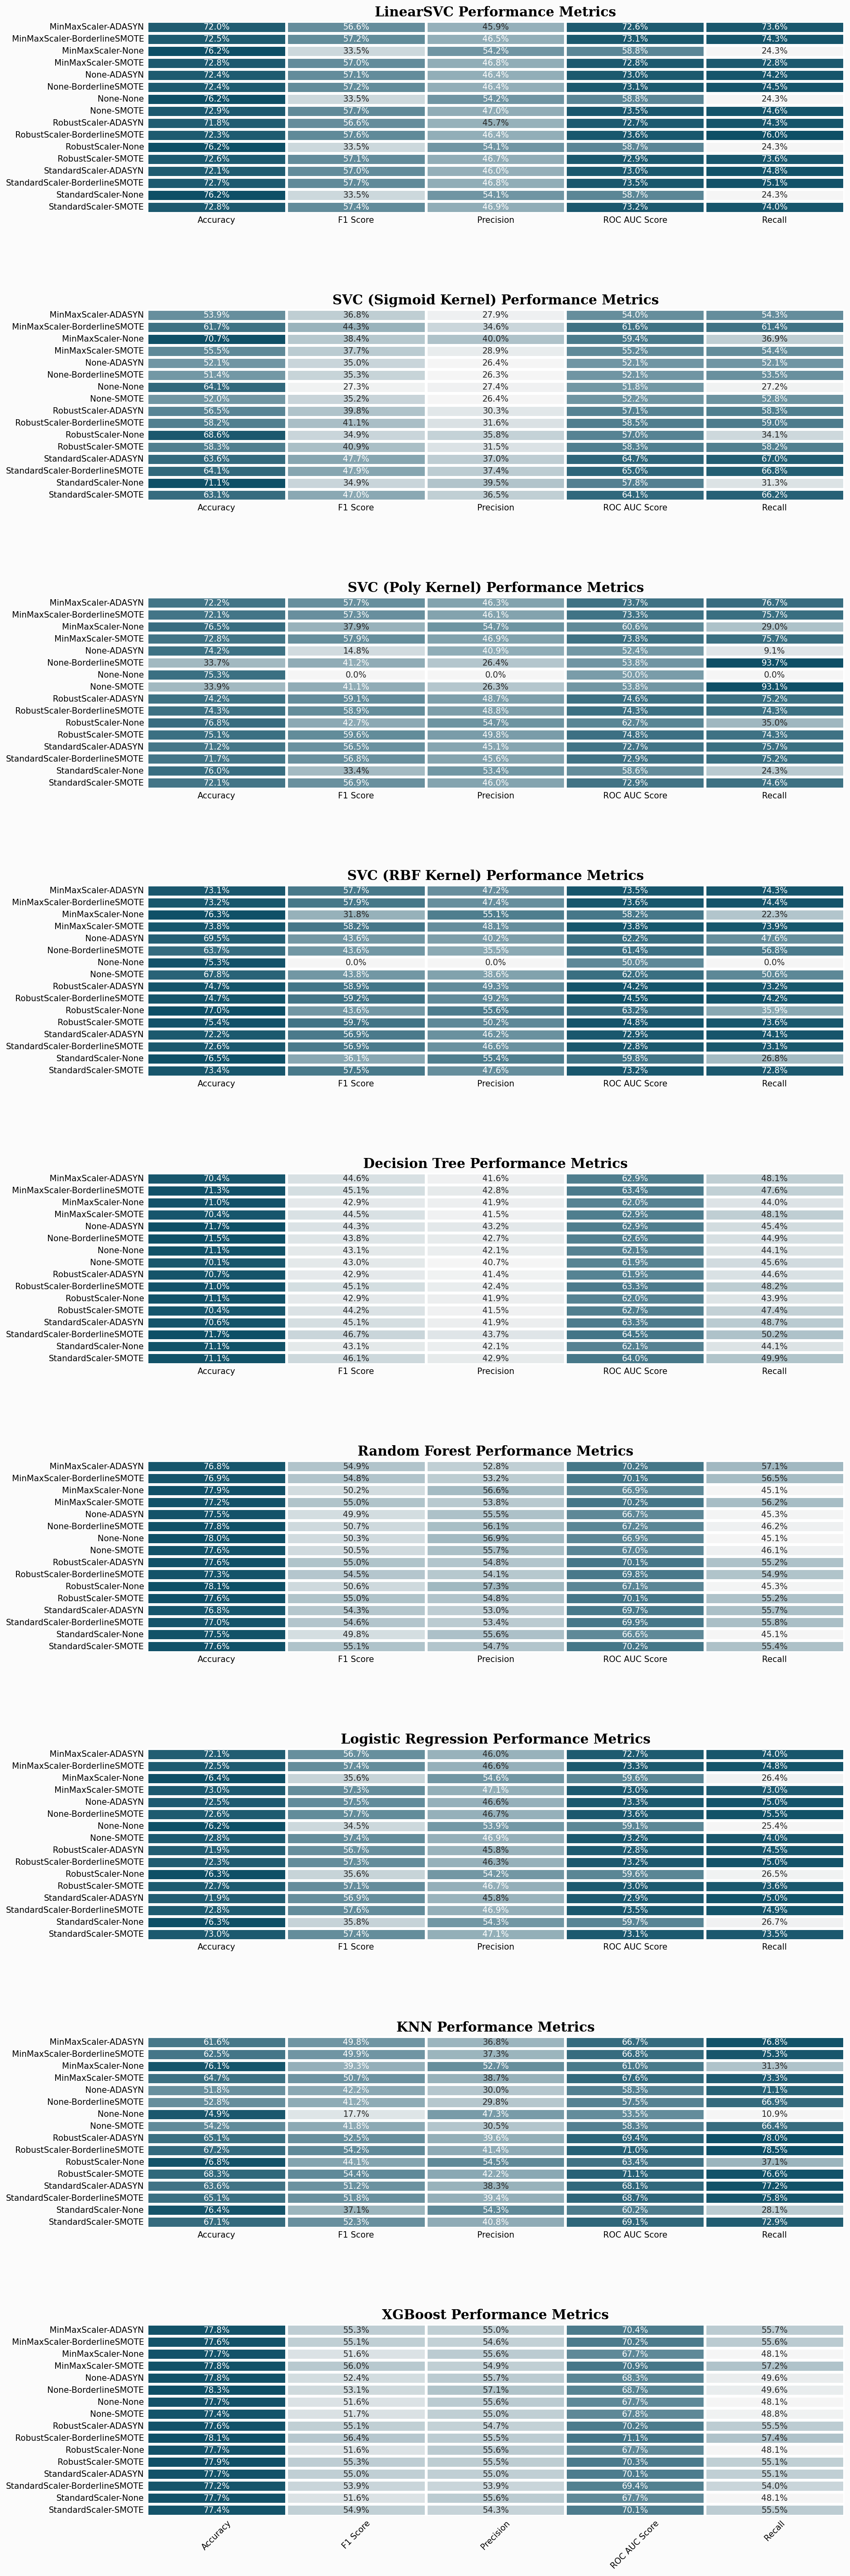

In [244]:
from matplotlib.patches import Rectangle

# Define unique models
unique_models = results_df['Model'].unique()

# Adjust the figure and grid size
fig, axes = plt.subplots(len(unique_models), 1, figsize=(15, len(unique_models) * 6), dpi=150)
fig.subplots_adjust(hspace=0.5)

# Define colors and colormap
colors = ["#f5f5f5", "#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)  # figure background color

# Iterate over each model and plot
for ax, model in zip(axes, unique_models):
    # Filter data for the specific model
    model_data = results_df[results_df['Model'] == model]
    
    # Pivot the data for heatmap
    model_pivot = model_data.pivot_table(index=['Scaler', 'Sampler'], 
                                         values=['Accuracy', 'Recall', 'Precision', 'ROC AUC Score', 'F1 Score'],
                                         aggfunc='mean')
    
    # Draw the heatmap
    sns.heatmap(model_pivot, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax)
    
    # Customize appearance
    ax.set_facecolor(background_color)
    ax.set_title(f'{model} Performance Metrics', fontfamily='serif', fontsize=16, fontweight='bold')
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Optionally highlight specific rows if needed
    # Example: Highlight RobustScaler rows
    # for row in model_pivot.index:
    #     if 'RobustScaler' in row:
    #         idx = model_pivot.index.get_loc(row)
    #         rect = ax.add_patch(Rectangle((0, idx), len(model_pivot.columns), 1, fill=True,
    #                                       color='#0e4f66', edgecolor='white', lw=0, alpha=0.5))

# Display the plot
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

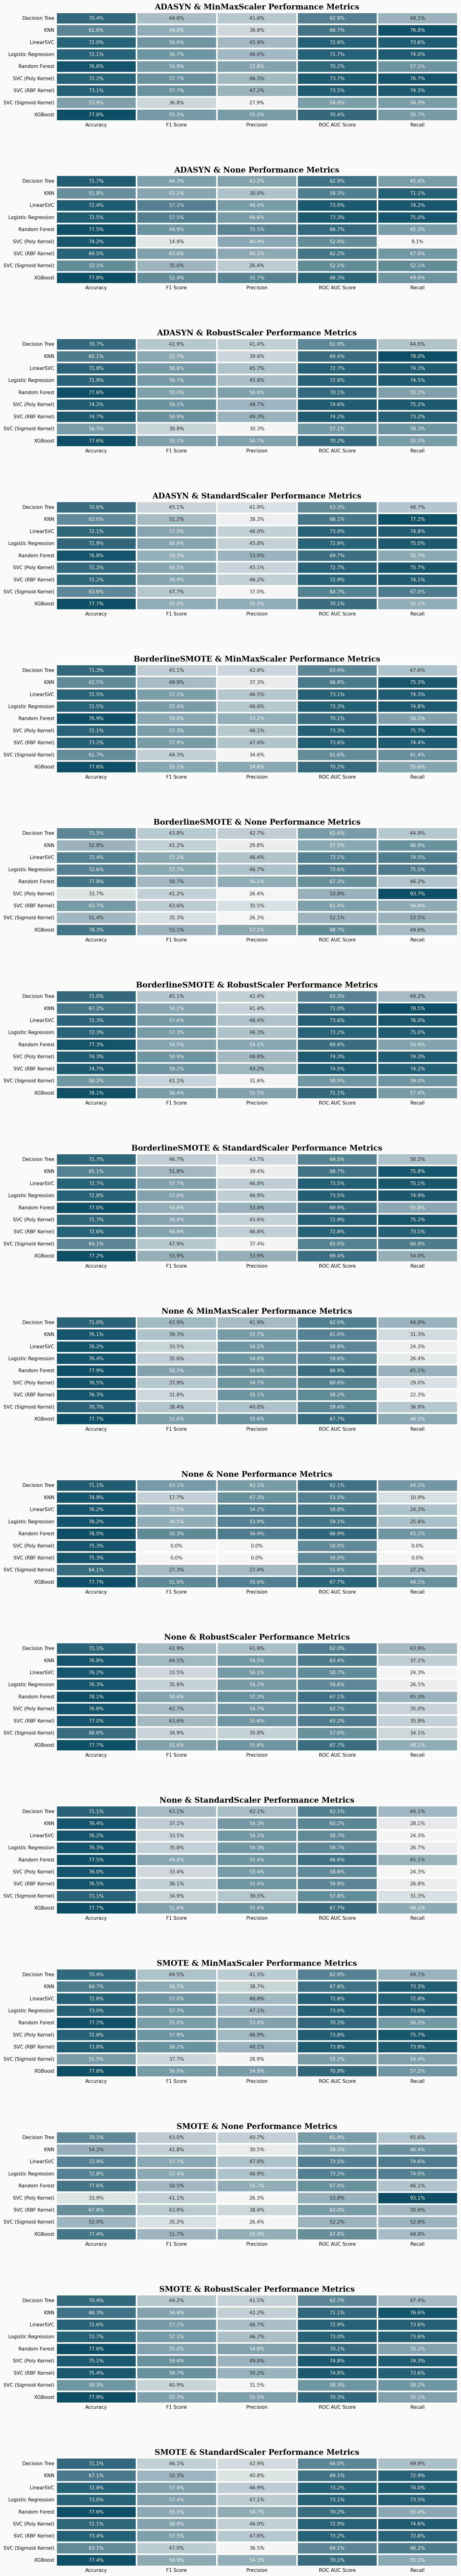

In [245]:
# Define unique sampler-scaler combinations
unique_combinations = results_df.groupby(['Sampler', 'Scaler']).size().reset_index().drop(0, axis=1)

# Adjust the figure and grid size
fig, axes = plt.subplots(len(unique_combinations), 1, figsize=(15, len(unique_combinations) * 6), dpi=150)
fig.subplots_adjust(hspace=0.5)

# Define colors and colormap
colors = ["#f5f5f5", "#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)  # figure background color

# Iterate over each sampler-scaler combination and plot
for ax, (sampler, scaler) in zip(axes, unique_combinations.values):
    # Filter data for the specific combination
    combo_data = results_df[(results_df['Sampler'] == sampler) & (results_df['Scaler'] == scaler)]
    
    # Pivot the data for heatmap
    combo_pivot = combo_data.pivot_table(index=['Model'], 
                                         values=['Accuracy', 'Recall', 'Precision', 'ROC AUC Score', 'F1 Score'],
                                         aggfunc='mean')
    
    # Draw the heatmap
    sns.heatmap(combo_pivot, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax)
    
    # Customize appearance
    ax.set_facecolor(background_color)
    ax.set_title(f'{sampler} & {scaler} Performance Metrics', fontfamily='serif', fontsize=16, fontweight='bold')
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Display the plot
plt.show()

In [246]:
average_metrics = results_df.groupby(['Sampler', 'Scaler']).agg({
    'Accuracy': 'mean',
    'Recall': 'mean',
    'Precision': 'mean',
    'ROC AUC Score': 'mean',
    'F1 Score': 'mean'
}).reset_index()

# Display the average metrics
print(average_metrics)

# Optional: Display in a formatted table
average_metrics_display = average_metrics.style.background_gradient(cmap='viridis').set_caption("Average Metrics by Sampler and Scaler")
average_metrics_display


            Sampler          Scaler  Accuracy    Recall  Precision  \
0            ADASYN    MinMaxScaler  0.699797  0.656219   0.443835   
1            ADASYN            None  0.688391  0.521480   0.427535   
2            ADASYN    RobustScaler  0.711203  0.654267   0.455777   
3            ADASYN  StandardScaler  0.710768  0.670182   0.453785   
4   BorderlineSMOTE    MinMaxScaler  0.711493  0.661882   0.454501   
5   BorderlineSMOTE            None  0.637983  0.623999   0.407743   
6   BorderlineSMOTE    RobustScaler  0.717099  0.663933   0.461881   
7   BorderlineSMOTE  StandardScaler  0.716495  0.667643   0.459627   
8              None    MinMaxScaler  0.753999  0.341535   0.517309   
9              None            None  0.743004  0.250049   0.375046   
10             None    RobustScaler  0.753758  0.366921   0.515359   
11             None  StandardScaler  0.754241  0.331869   0.515942   
12            SMOTE    MinMaxScaler  0.708907  0.649580   0.451931   
13            SMOTE 

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/703379380.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(average_metrics.pivot('Sampler', 'Scaler'), annot=True, fmt=".3f", cmap='coolwarm', ax=ax)


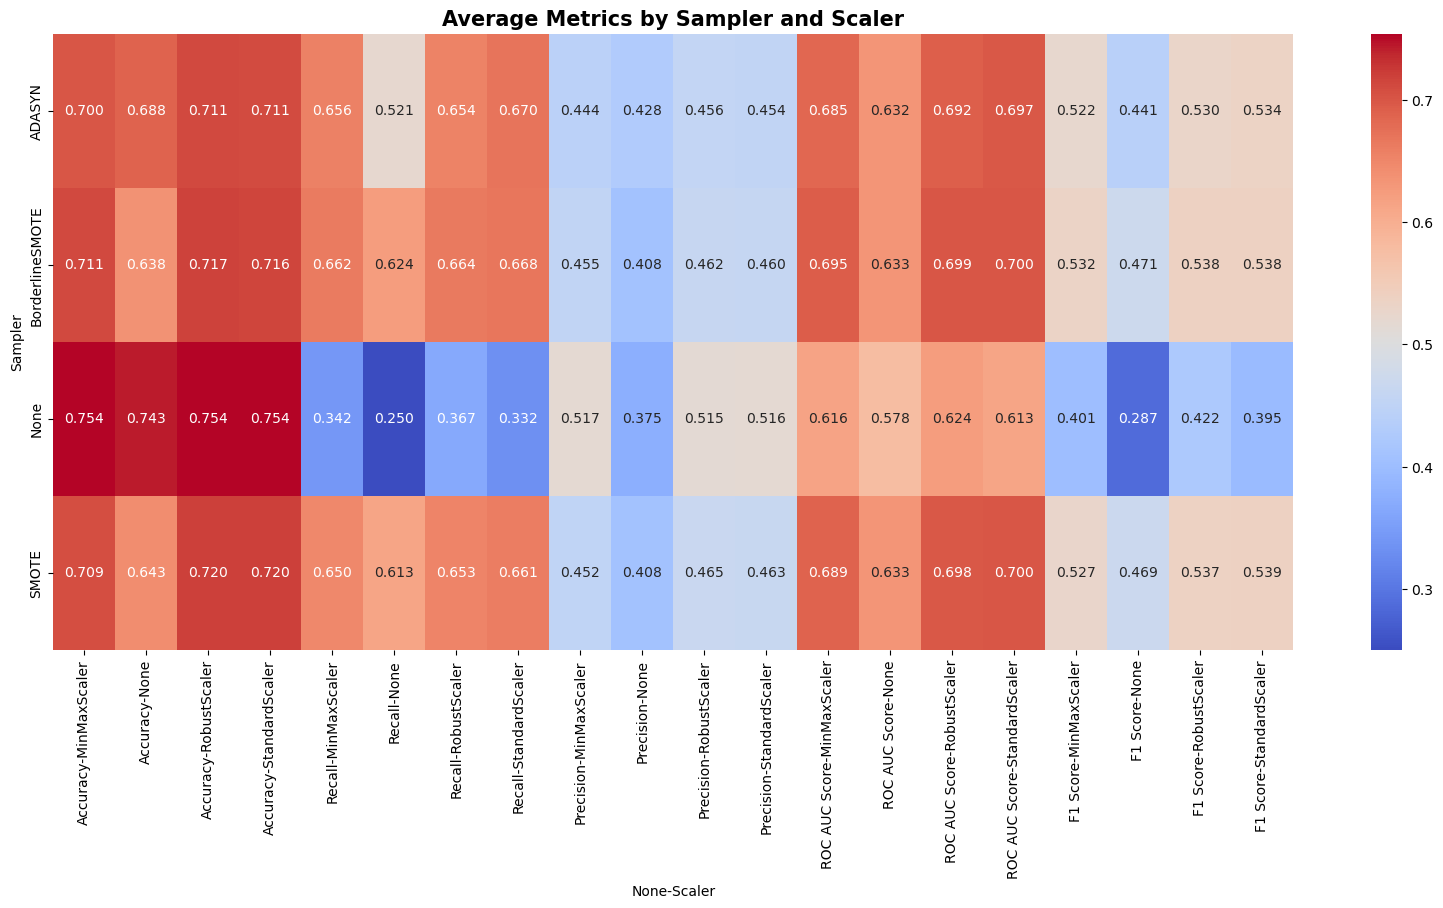

In [247]:
# Display the results as a heatmap for better visualization
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(average_metrics.pivot('Sampler', 'Scaler'), annot=True, fmt=".3f", cmap='coolwarm', ax=ax)
ax.set_title('Average Metrics by Sampler and Scaler', fontsize=15, fontweight='bold')
plt.show()

### None 제외 결과

In [251]:
results_none_df = results_df[results_df['Sampler'] != 'None']
results_none_df = results_none_df[results_none_df['Scaler'] != 'None']
results_none_df

Model          Scaler          Sampler  Accuracy    Recall  \
5    LinearSVC  StandardScaler            SMOTE  0.727925  0.739895   
6    LinearSVC  StandardScaler           ADASYN  0.720531  0.747803   
7    LinearSVC  StandardScaler  BorderlineSMOTE  0.727055  0.751318   
9    LinearSVC    MinMaxScaler            SMOTE  0.727925  0.728471   
10   LinearSVC    MinMaxScaler           ADASYN  0.720096  0.736380   
..         ...             ...              ...       ...       ...   
138    XGBoost    MinMaxScaler           ADASYN  0.777512  0.557118   
139    XGBoost    MinMaxScaler  BorderlineSMOTE  0.775555  0.556239   
141    XGBoost    RobustScaler            SMOTE  0.779469  0.550967   
142    XGBoost    RobustScaler           ADASYN  0.775990  0.555360   
143    XGBoost    RobustScaler  BorderlineSMOTE  0.780774  0.573814   

     Precision  ROC AUC Score  F1 Score  
5     0.468559       0.731941  0.573765  
6     0.460249       0.729682  0.569802  
7     0.467980       0.735197  0.576728  
9     0.468097       0.728108  0.569955  
10    0.459178       0.725560  0.565643  
..         ...            ...       ...  
138   0.549870       0.703559  0.553470  
139   0.545690       0.701963  0.550914  
141   0.554867       0.702795  0.552910  
142   0.546713       0.701958  0.551003  
143   0.555272       0.711329  0.564391  

[81 rows x 8 columns]

In [262]:
# Reorder the columns of results_none_df
desired_order = ['F1 Score', 'Recall', 'Precision', 'Accuracy', 'ROC AUC Score']
# Ensure the dataframe contains all the desired columns
existing_columns = [col for col in desired_order if col in results_none_df.columns]
results_none_df = results_none_df[existing_columns + [col for col in results_none_df.columns if col not in existing_columns]]

# Sort the dataframe by 'F1 Score' in descending order
results_none_df = results_none_df.sort_values(by='F1 Score', ascending=False)

# Display the updated dataframe
results_none_df.head(20)


F1 Score    Recall  Precision  Accuracy  ROC AUC Score  \
61   0.596791  0.735501   0.502100  0.754023       0.747808   
45   0.596330  0.742531   0.498231  0.751196       0.748288   
63   0.591658  0.741652   0.492128  0.746629       0.744959   
46   0.590956  0.752197   0.486640  0.742279       0.745607   
62   0.589317  0.731986   0.493191  0.747499       0.742294   
47   0.588931  0.743409   0.487608  0.743149       0.743237   
57   0.582410  0.739016   0.480571  0.737712       0.738150   
41   0.579408  0.756591   0.469466  0.728143       0.737688   
59   0.579343  0.744288   0.474244  0.732492       0.736450   
42   0.577190  0.767135   0.462639  0.721836       0.737036   
58   0.577186  0.742531   0.472067  0.730753       0.734705   
7    0.576728  0.751318   0.467980  0.727055       0.735197   
103  0.576455  0.748682   0.468647  0.727708       0.734746   
15   0.576282  0.760105   0.464056  0.723358       0.735689   
53   0.575400  0.727592   0.475862  0.734232       0.732004   
107  0.573837  0.747803   0.465536  0.725098       0.732717   
101  0.573782  0.734622   0.470721  0.729883       0.731473   
5    0.573765  0.739895   0.468559  0.727925       0.731941   
43   0.573045  0.756591   0.461168  0.720966       0.732920   
111  0.572770  0.750439   0.463124  0.722923       0.732156   

                   Model          Scaler          Sampler  
61      SVC (RBF Kernel)    RobustScaler            SMOTE  
45     SVC (Poly Kernel)    RobustScaler            SMOTE  
63      SVC (RBF Kernel)    RobustScaler  BorderlineSMOTE  
46     SVC (Poly Kernel)    RobustScaler           ADASYN  
62      SVC (RBF Kernel)    RobustScaler           ADASYN  
47     SVC (Poly Kernel)    RobustScaler  BorderlineSMOTE  
57      SVC (RBF Kernel)    MinMaxScaler            SMOTE  
41     SVC (Poly Kernel)    MinMaxScaler            SMOTE  
59      SVC (RBF Kernel)    MinMaxScaler  BorderlineSMOTE  
42     SVC (Poly Kernel)    MinMaxScaler           ADASYN  
58      SVC (RBF Kernel)    MinMaxScaler           ADASYN  
7              LinearSVC  StandardScaler  BorderlineSMOTE  
103  Logistic Regression  StandardScaler  BorderlineSMOTE  
15             LinearSVC    RobustScaler  BorderlineSMOTE  
53      SVC (RBF Kernel)  StandardScaler            SMOTE  
107  Logistic Regression    MinMaxScaler  BorderlineSMOTE  
101  Logistic Regression  StandardScaler            SMOTE  
5              LinearSVC  StandardScaler            SMOTE  
43     SVC (Poly Kernel)    MinMaxScaler  BorderlineSMOTE  
111  Logistic Regression    RobustScaler  BorderlineSMOTE

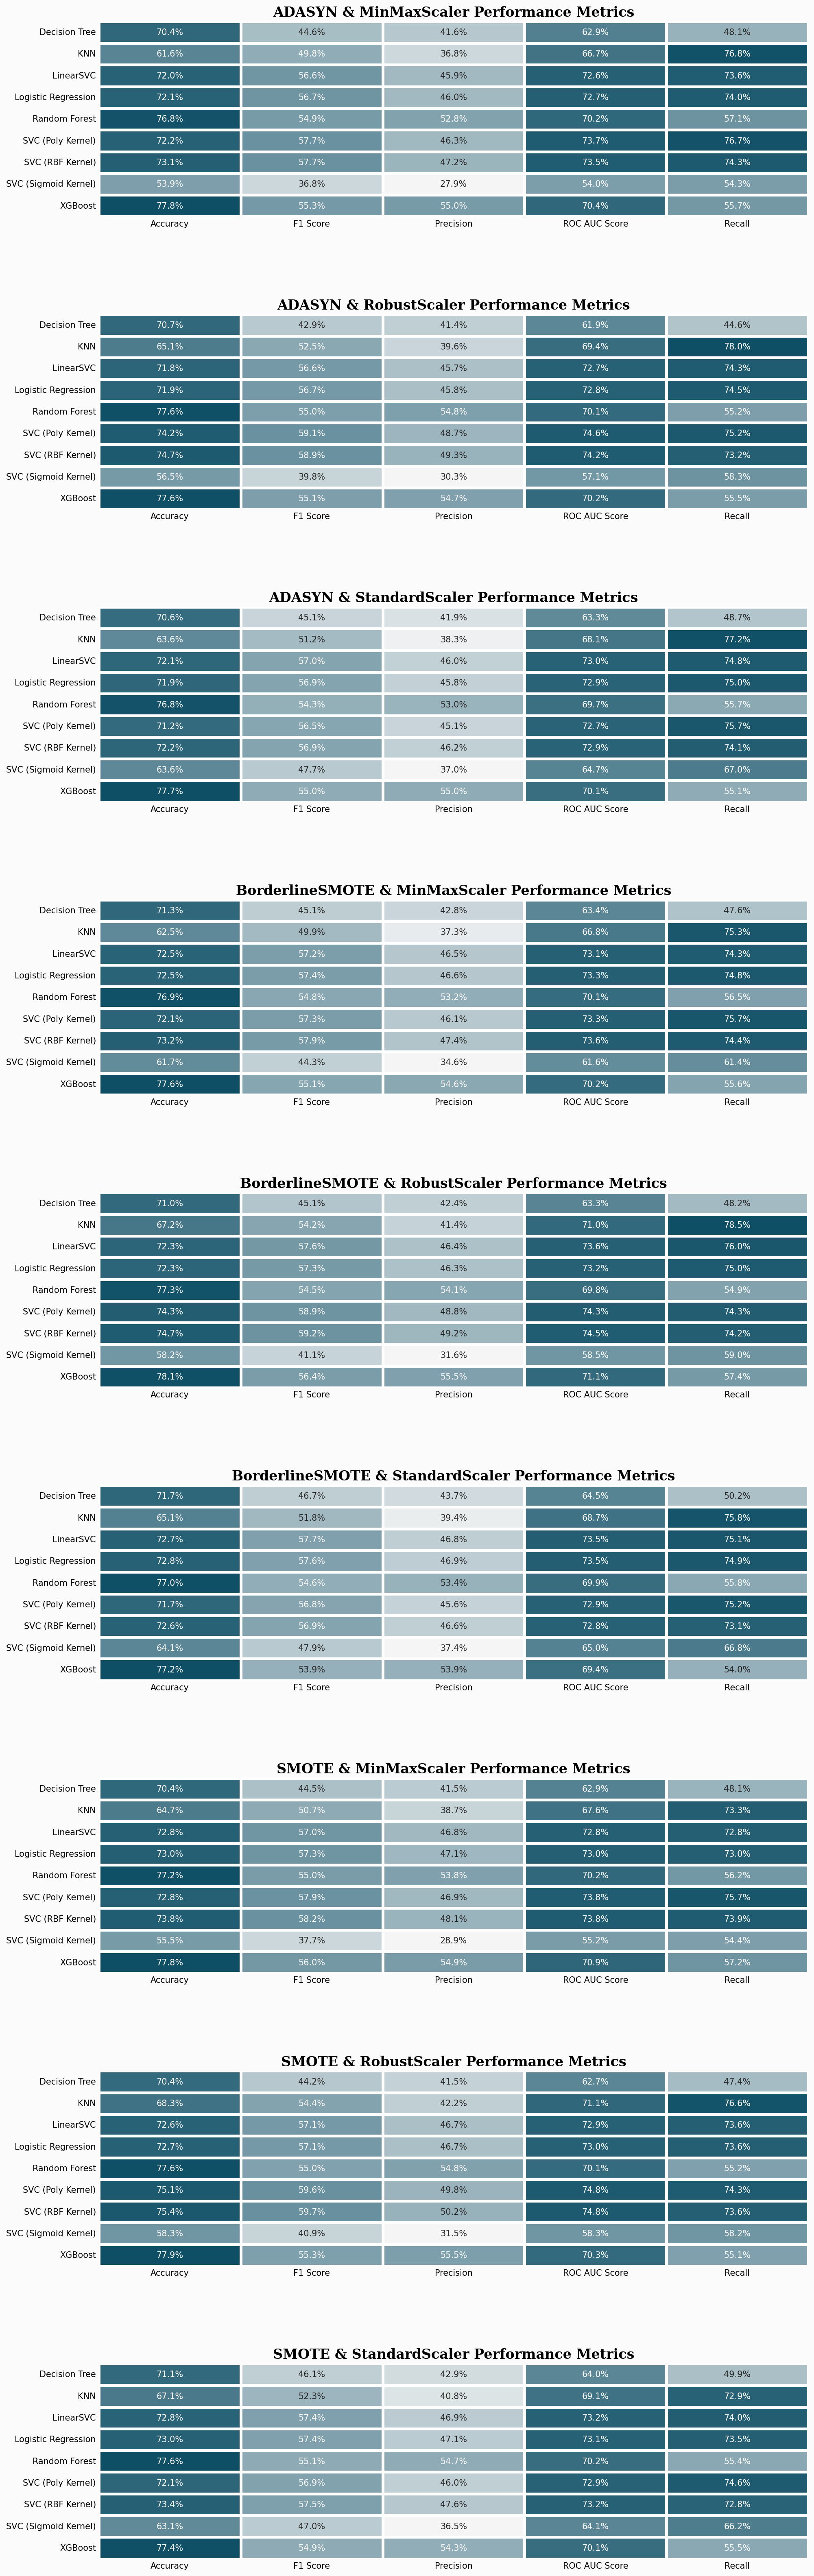

In [261]:
# Define unique sampler-scaler combinations
unique_combinations = results_none_df.groupby(['Sampler', 'Scaler']).size().reset_index().drop(0, axis=1)

# Adjust the figure and grid size
fig, axes = plt.subplots(len(unique_combinations), 1, figsize=(15, len(unique_combinations) * 6), dpi=150)
fig.subplots_adjust(hspace=0.5)

# Define colors and colormap
colors = ["#f5f5f5", "#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)  # figure background color

# Iterate over each sampler-scaler combination and plot
for ax, (sampler, scaler) in zip(axes, unique_combinations.values):
    # Filter data for the specific combination
    combo_data = results_df[(results_df['Sampler'] == sampler) & (results_df['Scaler'] == scaler)]
    
    # Pivot the data for heatmap
    combo_pivot = combo_data.pivot_table(index=['Model'], 
                                         values=['F1 Score', 'Recall', 'Precision', 'Accuracy', 'ROC AUC Score'],
                                         aggfunc='mean')
    
    # Draw the heatmap
    sns.heatmap(combo_pivot, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax)
    
    # Customize appearance
    ax.set_facecolor(background_color)
    ax.set_title(f'{sampler} & {scaler} Performance Metrics', fontfamily='serif', fontsize=16, fontweight='bold')
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Display the plot
plt.show()

In [253]:
average_metrics = results_none_df.groupby(['Sampler', 'Scaler']).agg({
    'Accuracy': 'mean',
    'Recall': 'mean',
    'Precision': 'mean',
    'ROC AUC Score': 'mean',
    'F1 Score': 'mean'
}).reset_index()

# Display the average metrics
print(average_metrics)

# Optional: Display in a formatted table
average_metrics_display = average_metrics.style.background_gradient(cmap='viridis').set_caption("Average Metrics by Sampler and Scaler")
average_metrics_display


           Sampler          Scaler  Accuracy    Recall  Precision  \
0           ADASYN    MinMaxScaler  0.699797  0.656219   0.443835   
1           ADASYN    RobustScaler  0.711203  0.654267   0.455777   
2           ADASYN  StandardScaler  0.710768  0.670182   0.453785   
3  BorderlineSMOTE    MinMaxScaler  0.711493  0.661882   0.454501   
4  BorderlineSMOTE    RobustScaler  0.717099  0.663933   0.461881   
5  BorderlineSMOTE  StandardScaler  0.716495  0.667643   0.459627   
6            SMOTE    MinMaxScaler  0.708907  0.649580   0.451931   
7            SMOTE    RobustScaler  0.720482  0.652607   0.465389   
8            SMOTE  StandardScaler  0.719612  0.660906   0.462988   

   ROC AUC Score  F1 Score  
0       0.685175  0.522394  
1       0.692098  0.529704  
2       0.697149  0.533995  
3       0.694846  0.532163  
4       0.699259  0.538207  
5       0.700103  0.537815  
6       0.689000  0.527126  
7       0.697707  0.537043  
8       0.699914  0.538537  


/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/703379380.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(average_metrics.pivot('Sampler', 'Scaler'), annot=True, fmt=".3f", cmap='coolwarm', ax=ax)


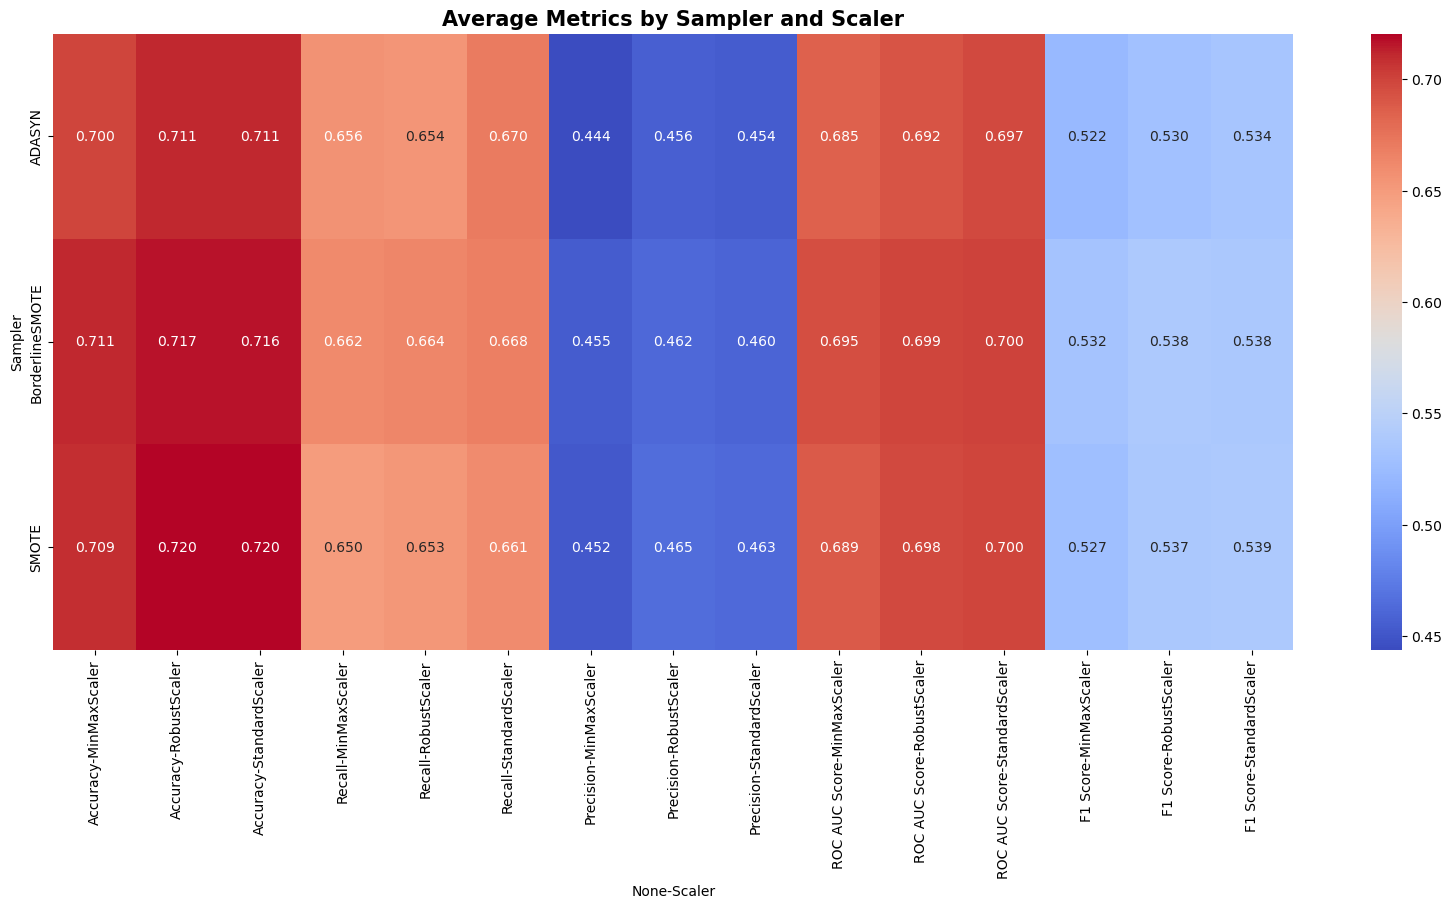

In [254]:
# Display the results as a heatmap for better visualization
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(average_metrics.pivot('Sampler', 'Scaler'), annot=True, fmt=".3f", cmap='coolwarm', ax=ax)
ax.set_title('Average Metrics by Sampler and Scaler', fontsize=15, fontweight='bold')
plt.show()

# Implementing SMOTE

In [65]:
# Our data is unbalanced, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [41]:
# Scale our data in pipeline

linear_svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',LinearSVC(random_state=42))])
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [42]:
#rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
#svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
#logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [43]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
# removed svm as took an incredibly long time to fit
#print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.8296410644464631
Logistic Regression mean : 0.7923274865043121


# Let's try the test data

In [44]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

rf_pipeline.fit(X_train_resh,y_train_resh)
#svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

rf_pred   =rf_pipeline.predict(X_test)
#svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
#svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
#svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

In [45]:
print('Mean scores:')
print('RF F1 score:',rf_f1)
print('RF Accuracy:',accuracy_score(y_test,rf_pred))
print('LR F1 score :',logreg_f1)
print('LR Accuracy:',accuracy_score(y_test,logreg_pred))

Mean scores:
RF F1 score: 0.5285016286644951
RF Accuracy: 0.7857539315448658
LR F1 score : 0.6056382641748496
LR Accuracy: 0.7696577243293247


In [46]:
smote_rf_df = pd.DataFrame(data=[accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['SMOTE Random Forest Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

smote_logreg_df = pd.DataFrame(data=[accuracy_score(y_test, logreg_pred), recall_score(y_test, logreg_pred),
                   precision_score(y_test, logreg_pred), roc_auc_score(y_test, logreg_pred)], 
             columns=['SMOTE Logistic Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])


smote_cm_log = confusion_matrix(y_test, logreg_pred)
smote_cm_rf = confusion_matrix(y_test, rf_pred)

# Viewing our results in an accesible way¶
We now now need to find a way to view our results which can be easily explained to business stakeholders.

A simple annotated heatmap works well for this!

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_21491/1418853736.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = ax0.add_patch(Rectangle((0, 6), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_21491/1418853736.py:118: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax8.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))


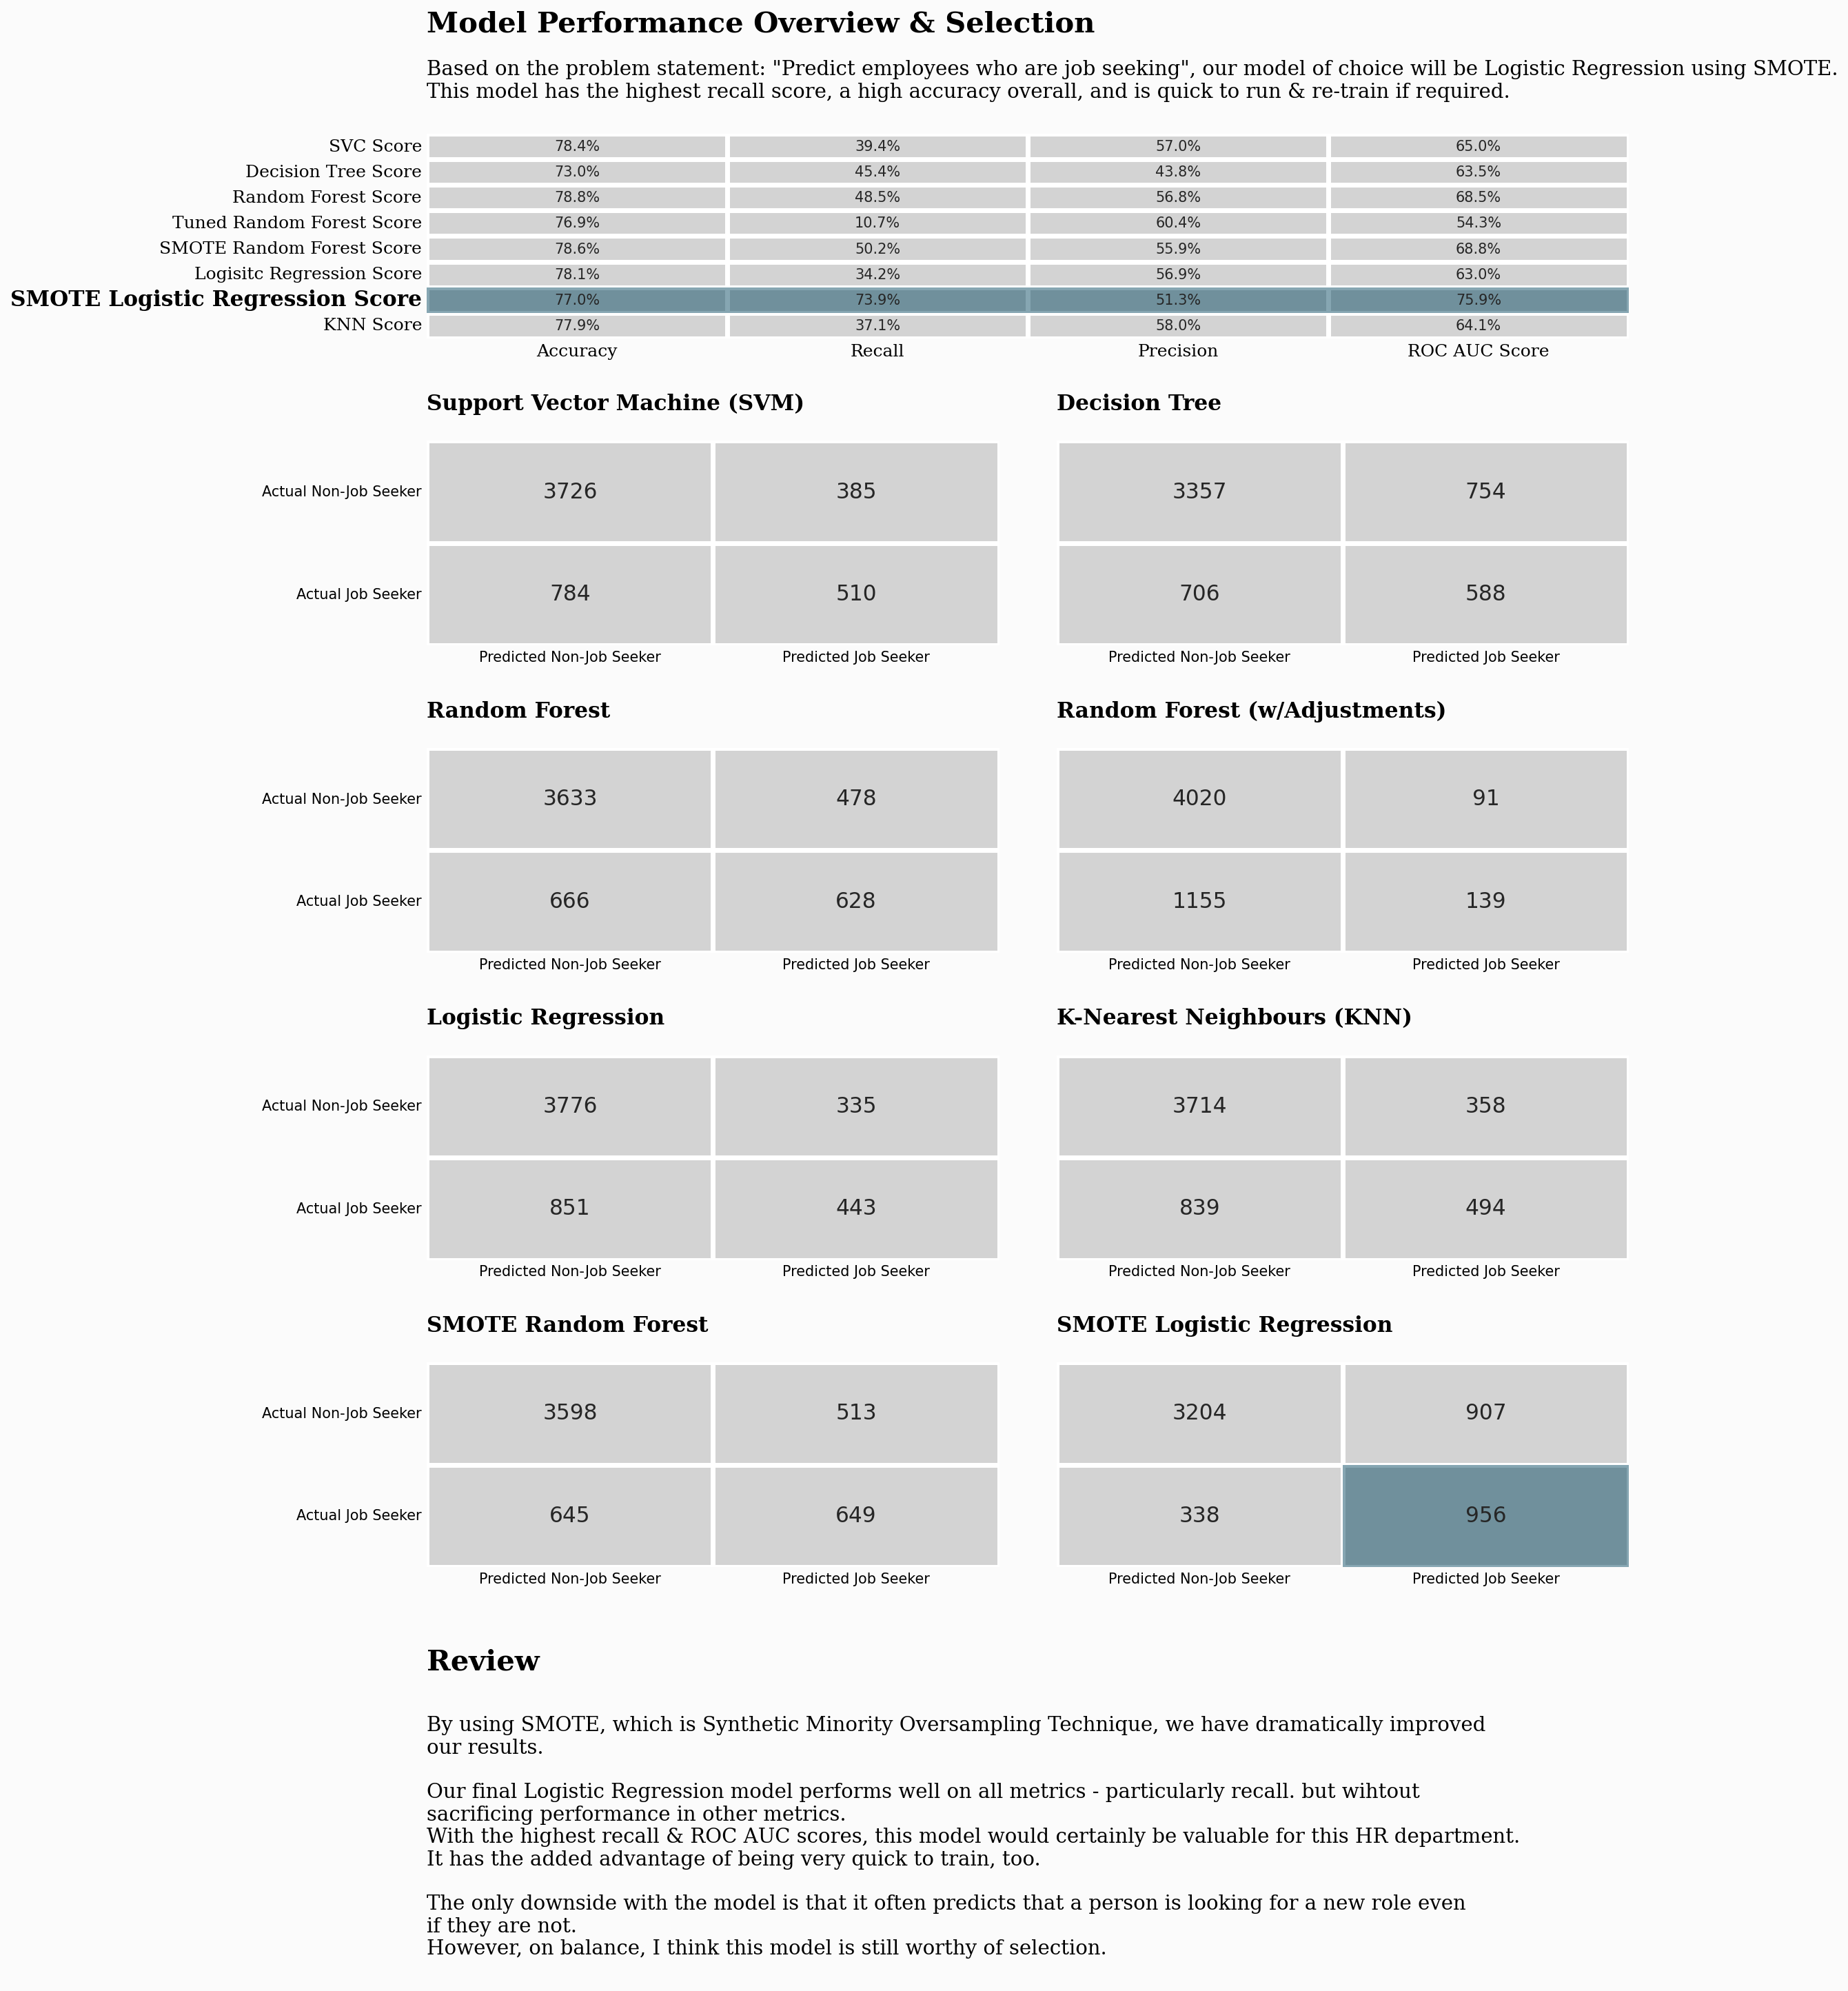

In [47]:
# Plotting our results

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(15,18), dpi=150) # create figure
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3,1])
ax7 = fig.add_subplot(gs[4,0])
ax8 = fig.add_subplot(gs[4,1])

# Overall
df_models = round(pd.concat([svc_df,dtree_df,rfc_df,trfc_df,smote_rf_df,log_df,smote_logreg_df,knn_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)


ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=12)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=12)

ax0.text(0,-4,'Model Performance Overview & Selection',fontfamily='serif',fontsize=20,fontweight='bold')
ax0.text(0,-0.55,
         '''
Based on the problem statement: "Predict employees who are job seeking", our model of choice will be Logistic Regression using SMOTE.
This model has the highest recall score, a high accuracy overall, and is quick to run & re-train if required.
'''
         ,fontfamily='serif',fontsize=14)



for lab, annot in zip(ax0.get_yticklabels(), ax0.texts):
    text =  lab.get_text()
    if text == 'SMOTE Logistic Regression Score': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(15)
        lab.set_color('black')
        



from matplotlib.patches import Rectangle

rect = ax0.add_patch(Rectangle((0, 6), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))



# svc
sns.heatmap(cm_svc, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

# dtree
sns.heatmap(cm_dtree, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax2,annot_kws={"fontsize":15})

# rf
sns.heatmap(cm_rfc, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax3,annot_kws={"fontsize":15})

# tuned rf
sns.heatmap(cm_trfc, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax4,annot_kws={"fontsize":15})

# log
sns.heatmap(cm_log, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax5,annot_kws={"fontsize":15})

# knn
sns.heatmap(cm_knn, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax6,annot_kws={"fontsize":15})

# smote rf
sns.heatmap(smote_cm_rf, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax7,annot_kws={"fontsize":15})

# smote log reg
sns.heatmap(smote_cm_log, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax8,annot_kws={"fontsize":15})



background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) 

ax0.set_xlabel("")
ax0.set_ylabel("")


ax1.text(0, -0.3, 'Support Vector Machine (SVM)',fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.3, 'Decision Tree', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.3, 'Random Forest',fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, -0.3, 'Random Forest (w/Adjustments)', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, -0.3, 'Logistic Regression',fontsize=15, fontweight='bold', fontfamily='serif')
ax6.text(0, -0.3, 'K-Nearest Neighbours (KNN)', fontsize=15, fontweight='bold', fontfamily='serif')
ax7.text(0, -0.3, 'SMOTE Random Forest',fontsize=15, fontweight='bold', fontfamily='serif')
ax8.text(0, -0.3, 'SMOTE Logistic Regression', fontsize=15, fontweight='bold', fontfamily='serif')


ax7.text(0, 3, 'Review',fontsize=20, fontweight='bold', fontfamily='serif')
ax7.text(0, 6, 
'''
By using SMOTE, which is Synthetic Minority Oversampling Technique, we have dramatically improved
our results.

Our final Logistic Regression model performs well on all metrics - particularly recall. but wihtout
sacrificing performance in other metrics.
With the highest recall & ROC AUC scores, this model would certainly be valuable for this HR department.
It has the added advantage of being very quick to train, too.

The only downside with the model is that it often predicts that a person is looking for a new role even
if they are not. 
However, on balance, I think this model is still worthy of selection. 
''',fontsize=14, fontfamily='serif')


from matplotlib.patches import Rectangle


ax8.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))

colors = ['gray','#0e4f66','#002d1d']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

- 코드 수정한 결과 SMOTE RF, SMOTE Logistic regression 결과랑 KNN 결과, RF, DT 가 다르게 나온다.

# Something else... Borderline SMOTE
There are many oversampling techniques that one could employ.

A variation of the technique used above is Borderline SMOTE.

Borderline SMOTE involves selecting those instances of the minority class that are misclassified.

We can then oversample just those difficult instances, providing more resolution only where it may be required

A great article cab be found here:

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## 이 부분도 있긴 한데, import 오류 나서,,, 실행은 안 할게요!! 그래도 우리가 찾은 코드들은 다 돌아갑니다.!!